In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Category files

In [2]:
def get_category(json_file):
    category_dict = defaultdict(int)
    with open (json_file) as file:
        response = json.load(file)
        for item in response['items']:
            category_dict[item['id']] = item['snippet']['title']
        return category_dict
category_us = get_category("US_category_id.json")
category_gb = get_category("GB_category_id.json")
category_ca = get_category("CA_category_id.json")
category_de = get_category("DE_category_id.json")
category_fr = get_category("FR_category_id.json")

# Data: Function Top50

In [3]:
#Read CSV
us = pd.read_csv("USvideos.csv")
gb = pd.read_csv("GBvideos.csv")
ca = pd.read_csv("CAvideos.csv")
de = pd.read_csv("DEvideos.csv")
fr = pd.read_csv("FRvideos.csv")

#Function for converting CSV into Top50 by month
def raw_to_top50(df, category_file):
    df['trending_date'] = pd.to_datetime(df['trending_date'], format = '%y.%d.%m')
    df['trending_YearMonth'] = df['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
    df['publish_time'] = pd.to_datetime(df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
    count_byMonth = df.groupby(['trending_YearMonth','title','category_id'])['video_id','views'].count() 
    top50_byMonth = count_byMonth['video_id'].groupby(level=0, group_keys=False).nlargest(50)
    top50_byMonth = pd.DataFrame(top50_byMonth)
    top50_byMonth = top50_byMonth.rename(columns={'video_id':'video_id_count'})
    top50_byMonth = top50_byMonth.reset_index()
    top50_byMonth['category_id'] = top50_byMonth['category_id'].astype(str)
    top50_byMonth['category'] = top50_byMonth['category_id'].map(lambda x: category_file.get(x))
    return top50_byMonth

In [4]:
us_top50_byMonth = raw_to_top50(us, category_us)
us_top50_byMonth.head()

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,Incredibles 2 Official Teaser Trailer,1,10,Film & Animation
1,2017-11,"Luis Fonsi, Demi Lovato - Échame La Culpa",10,10,Music
2,2017-11,A Quiet Place (2018) - Official Teaser Trailer...,1,9,Film & Animation
3,2017-11,A Wrinkle in Time Official US Trailer,1,9,Film & Animation
4,2017-11,Binging with Babish: Rachel's Trifle from Friends,24,9,Entertainment


In [5]:
gb_top50_byMonth = raw_to_top50(gb, category_gb)
gb_top50_byMonth.head()

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,CHRISTMAS ADVERTS & HOW WE MET,22,14,People & Blogs
1,2017-11,Ed Sheeran - Perfect (Official Music Video),10,14,Music
2,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,14,Music
3,2017-11,Fall Out Boy - HOLD ME TIGHT OR DON’T,10,14,Music
4,2017-11,Goals from Salford City vs Class of 92 and Fri...,17,14,Sports


In [6]:
ca_top50_byMonth = raw_to_top50(ca, category_ca)
ca_top50_byMonth.head()

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,Post Malone - rockstar ft. 21 Savage,10,8,Music
1,2017-11,Incredibles 2 Official Teaser Trailer,1,7,Film & Animation
2,2017-11,Water Bottle Flip 2 | Dude Perfect,17,7,Sports
3,2017-11,Cute Munda - Sharry Mann (Full Video Song) | P...,10,6,Music
4,2017-11,Deadpool’s “Wet on Wet” Teaser,1,6,Film & Animation


In [7]:
de_top50_byMonth = raw_to_top50(de, category_de)
de_top50_byMonth.head()

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,10 KEKS Lifehacks !,10,5,Music
1,2017-11,Azzi Memo - AMG 2 ft. Eno (prod. von SOTT & TG...,10,5,Music
2,2017-11,BVG – Ohne Uns,24,5,Entertainment
3,2017-11,Hört mal wie Marietta Slomka mit Christian Lin...,22,5,People & Blogs
4,2017-11,Incredibles 2 Official Teaser Trailer,1,5,Film & Animation


In [8]:
fr_top50_byMonth = raw_to_top50(fr, category_fr)
fr_top50_byMonth.head()

,trending_YearMonth,title,category_id,video_id_count,category
0,2017-11,Etoile filante 14 11 2017,28,5,Science & Technology
1,2017-11,OrelSan - Tout va bien [CLIP OFFICIEL],10,5,Music
2,2017-11,DE L’ACIDE SUR UNE POMME ? Will it dissolve,28,4,Science & Technology
3,2017-11,En TT #11 #BalanceTonPorc,23,4,Comedy
4,2017-11,Friendzone (feat. JULIEN PESTEL) - Parlons peu...,23,4,Comedy


# Count of Trending Days: Bar Charts

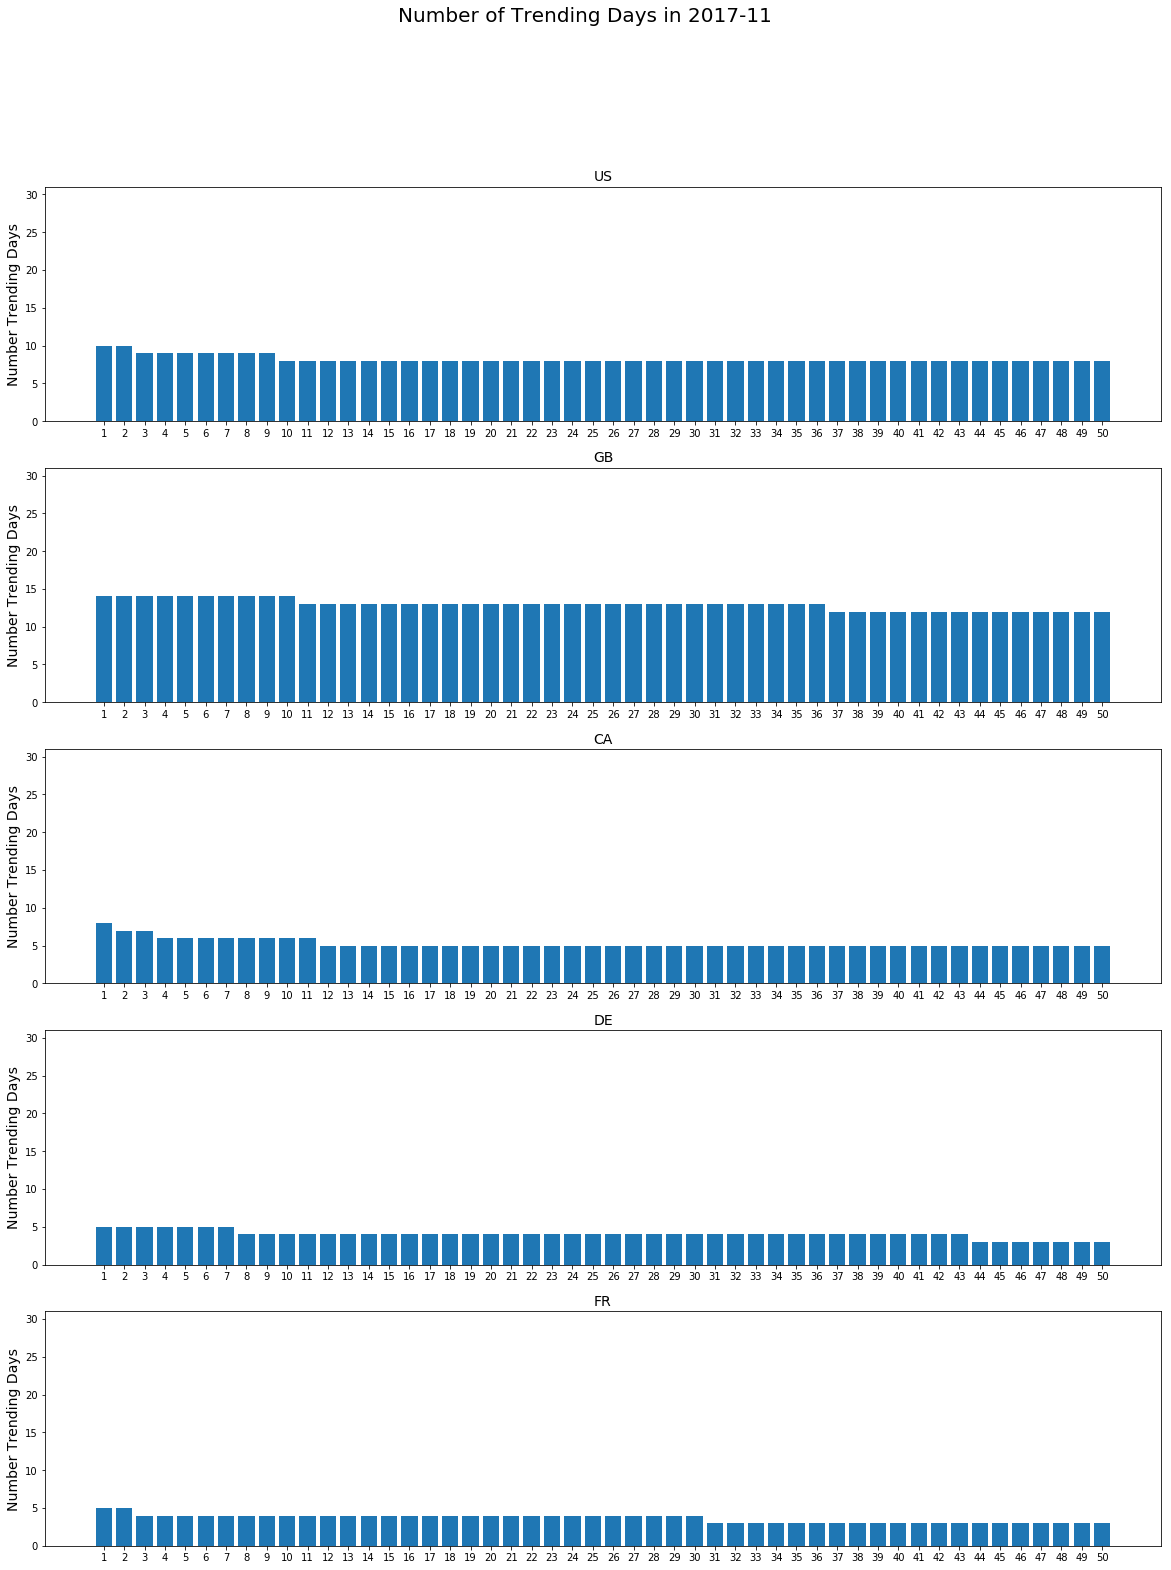

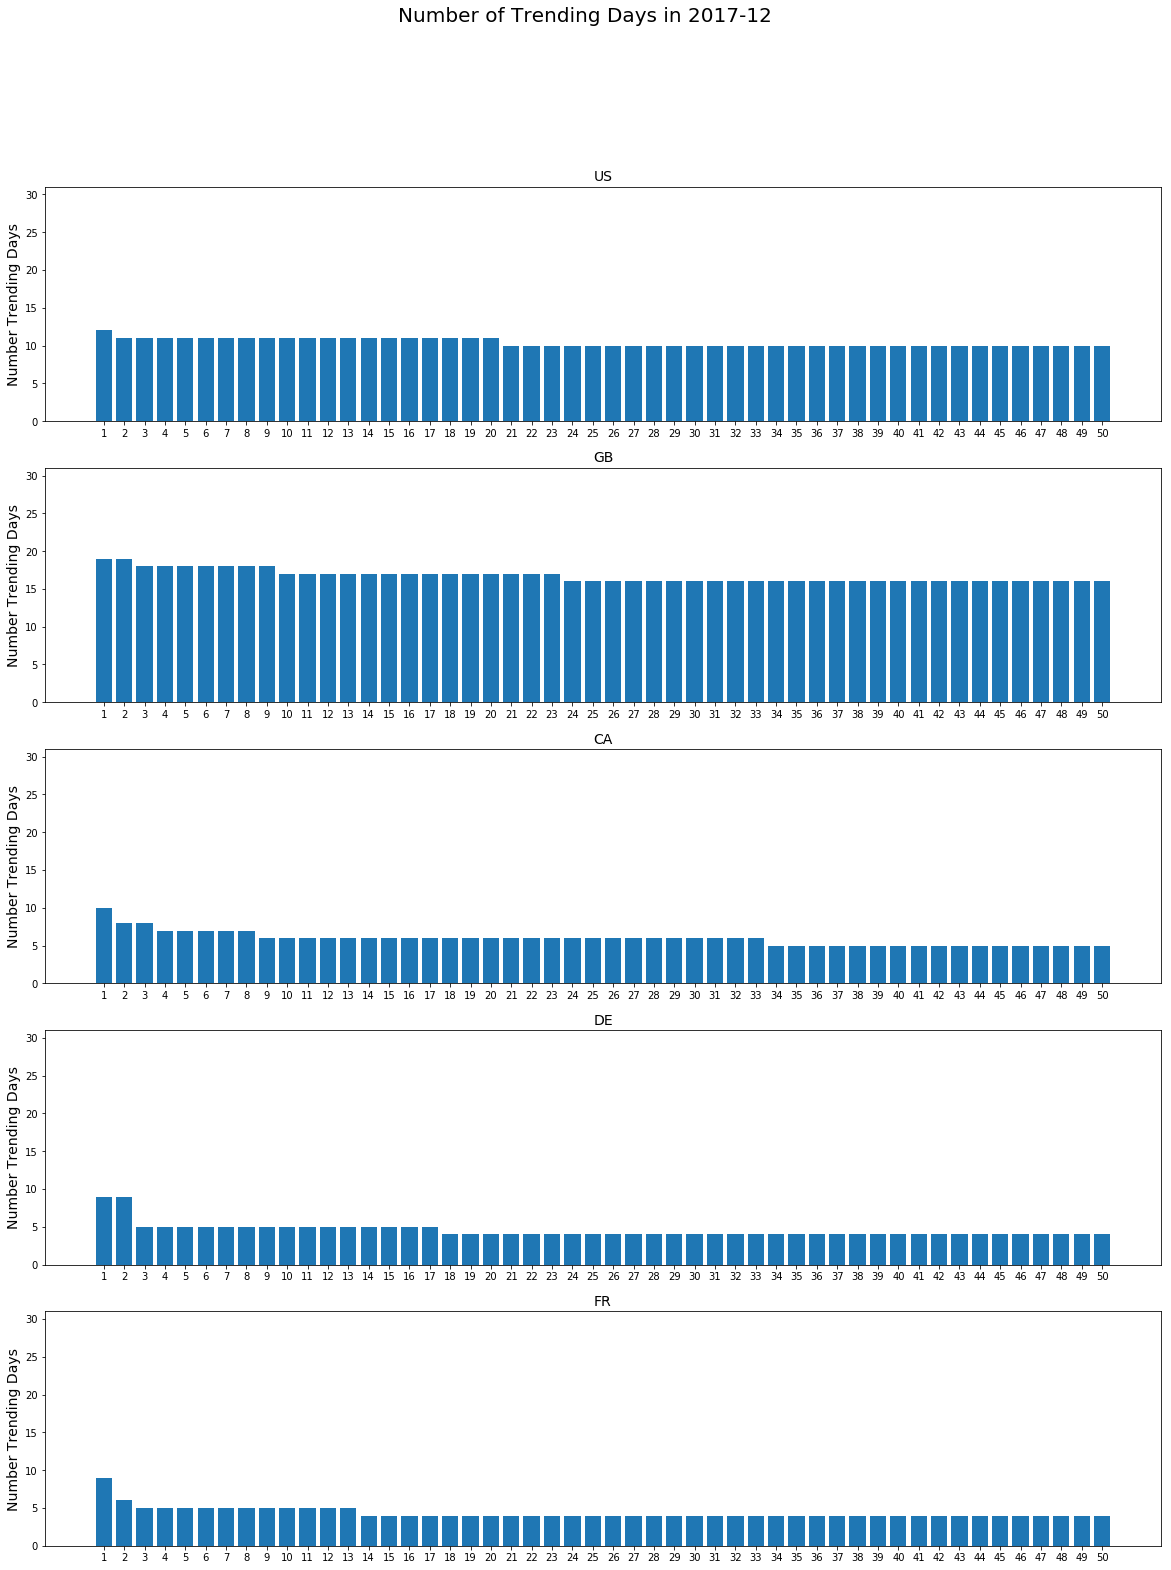

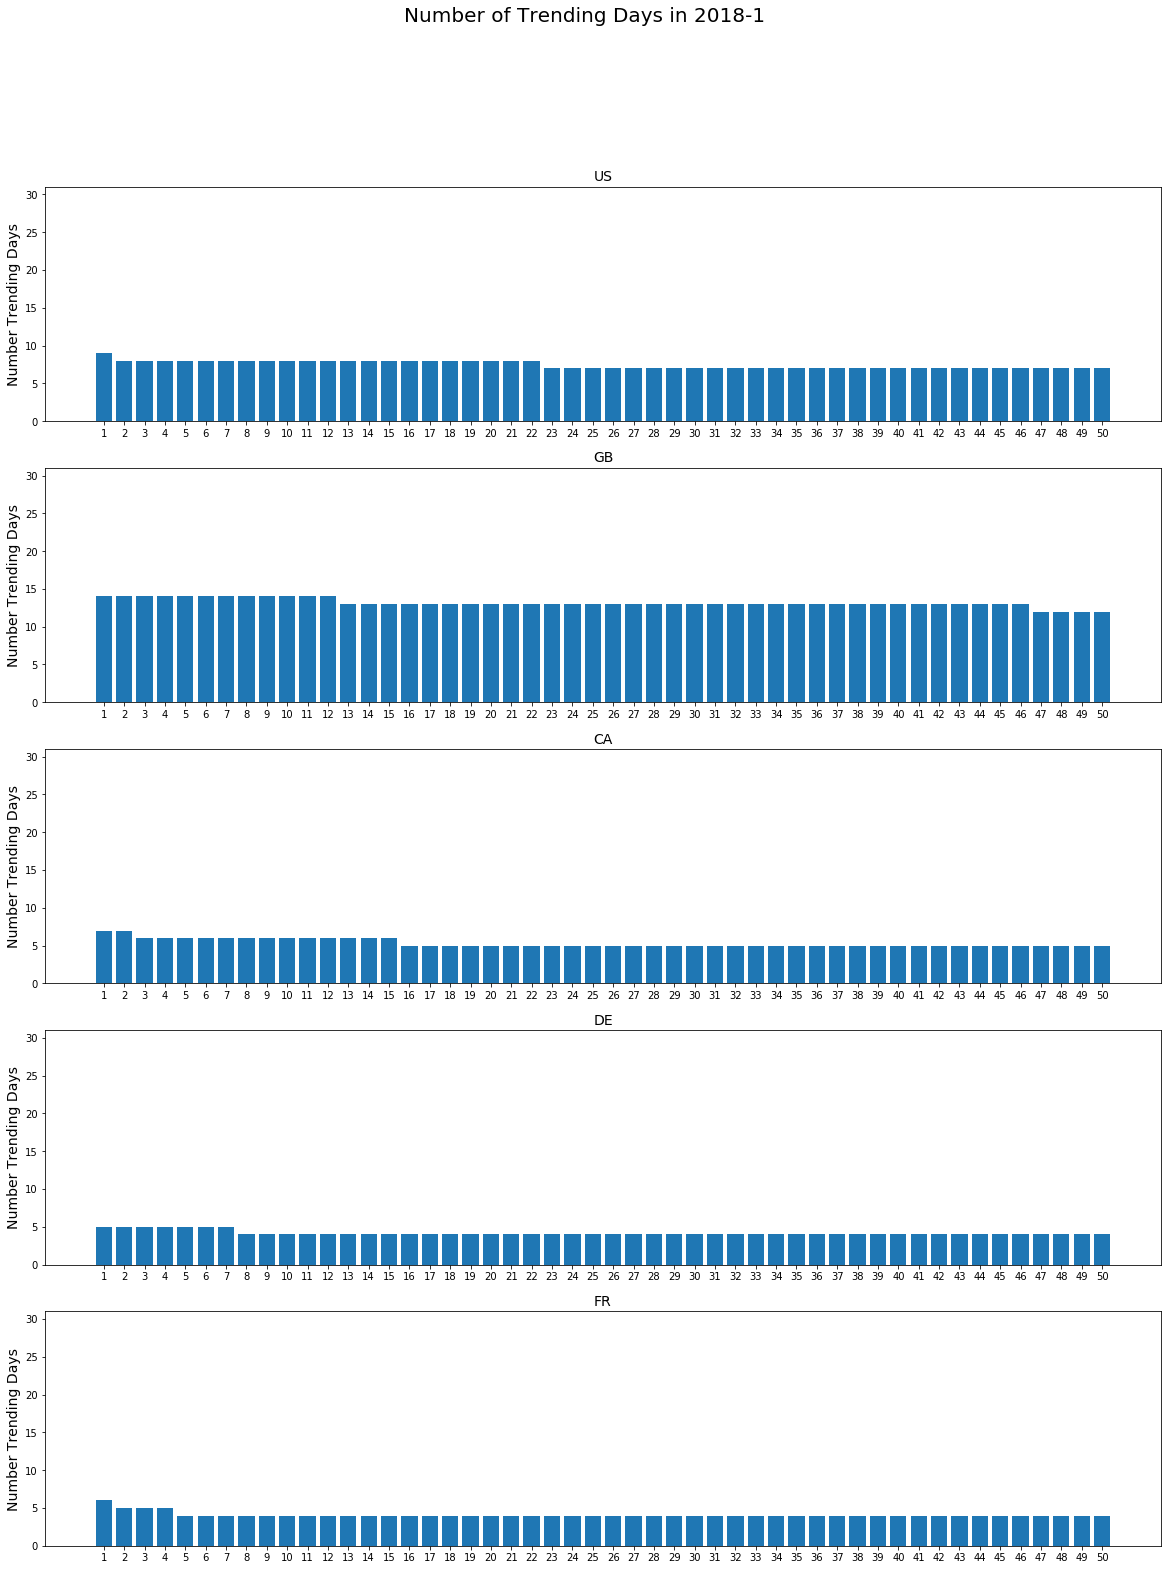

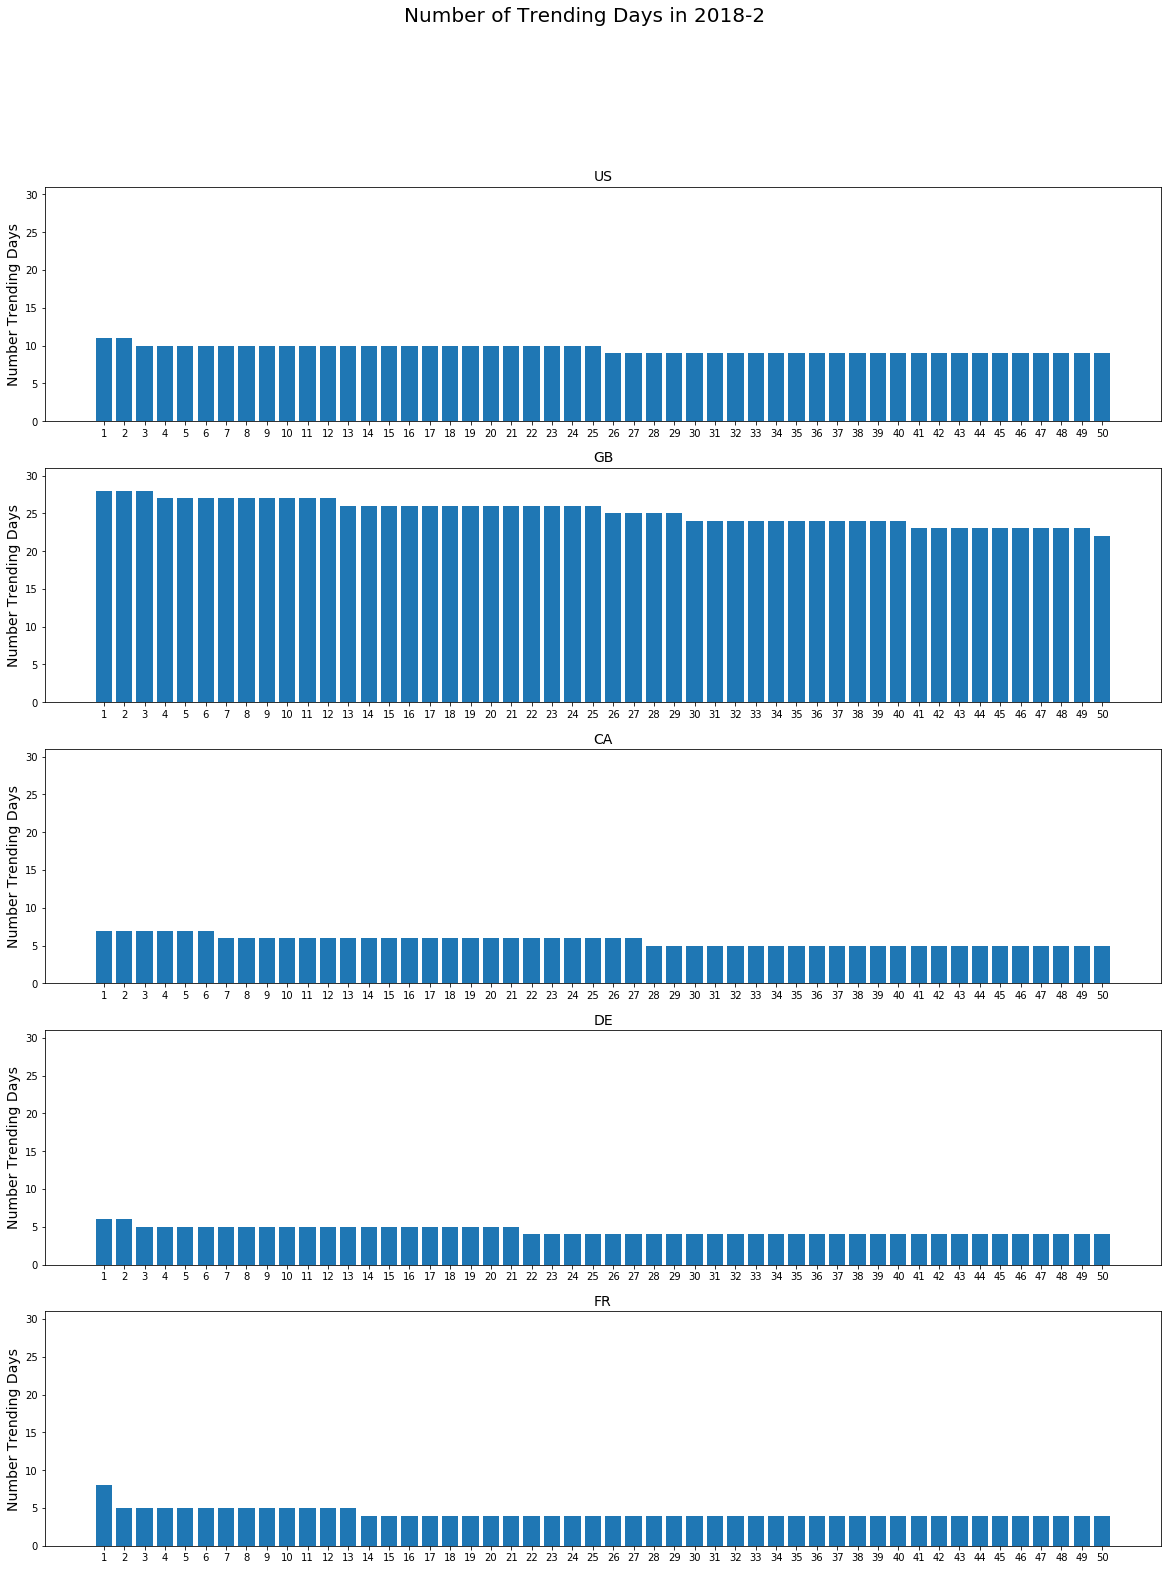

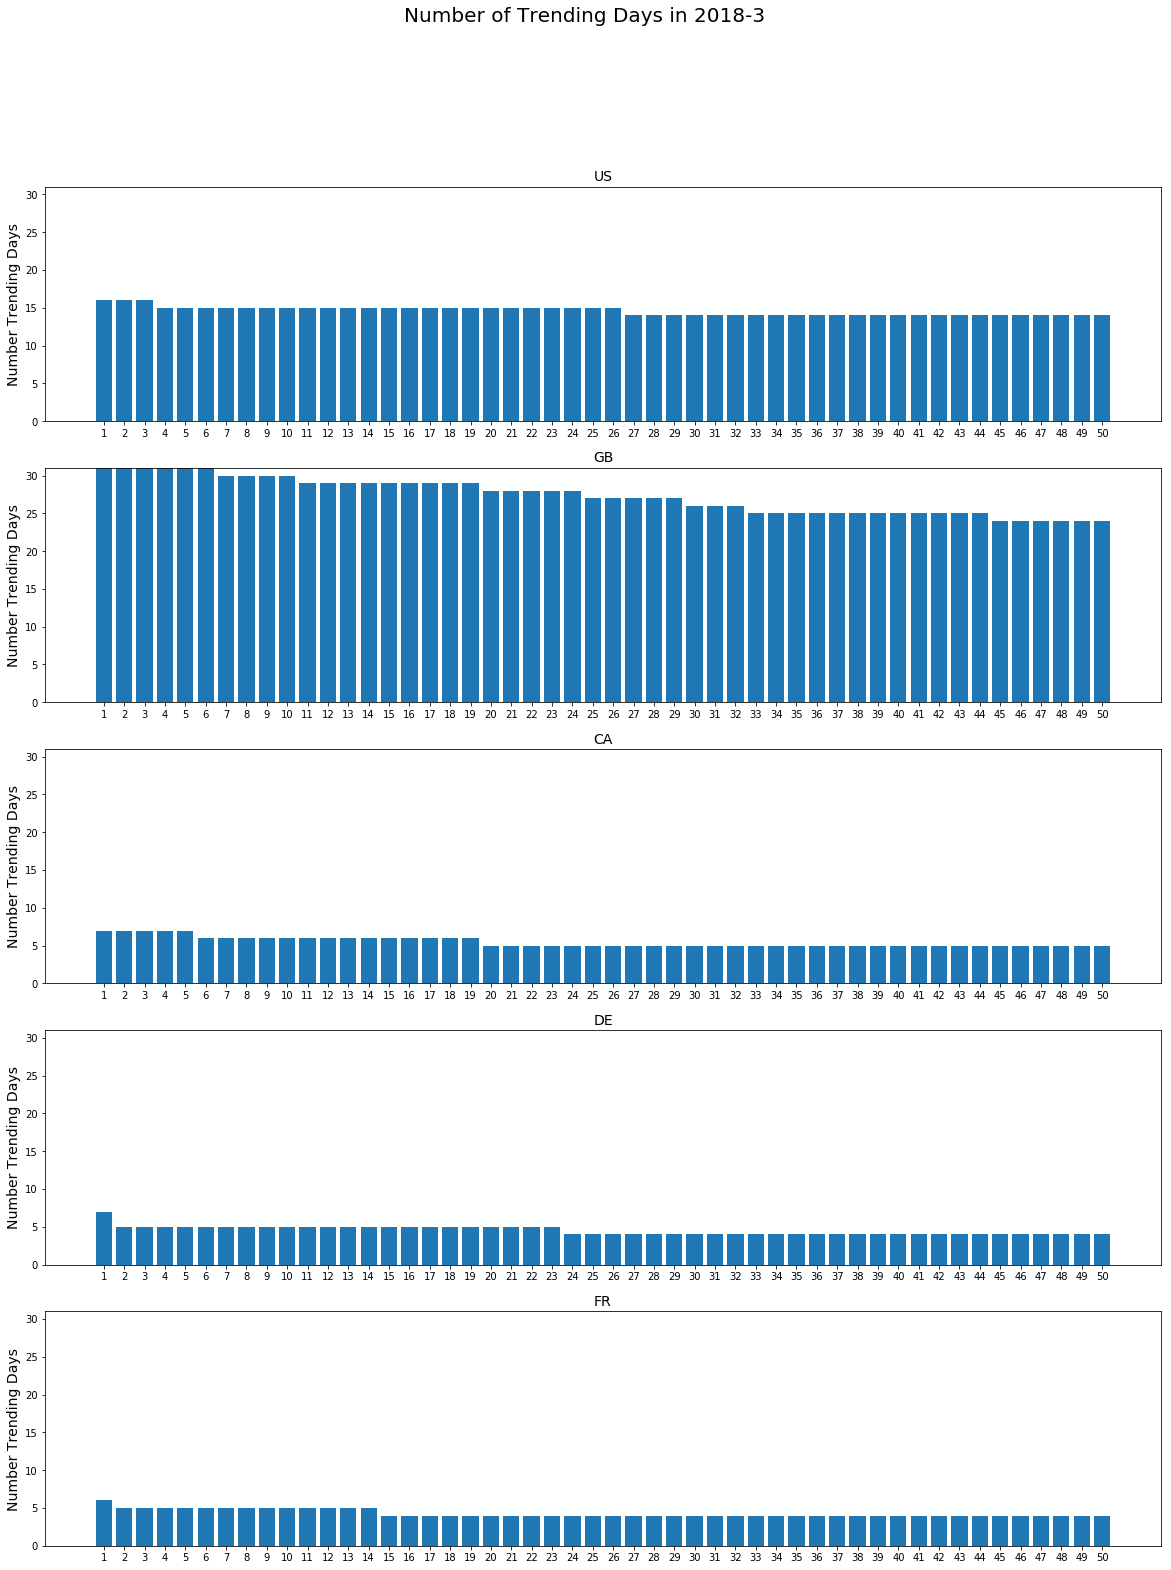

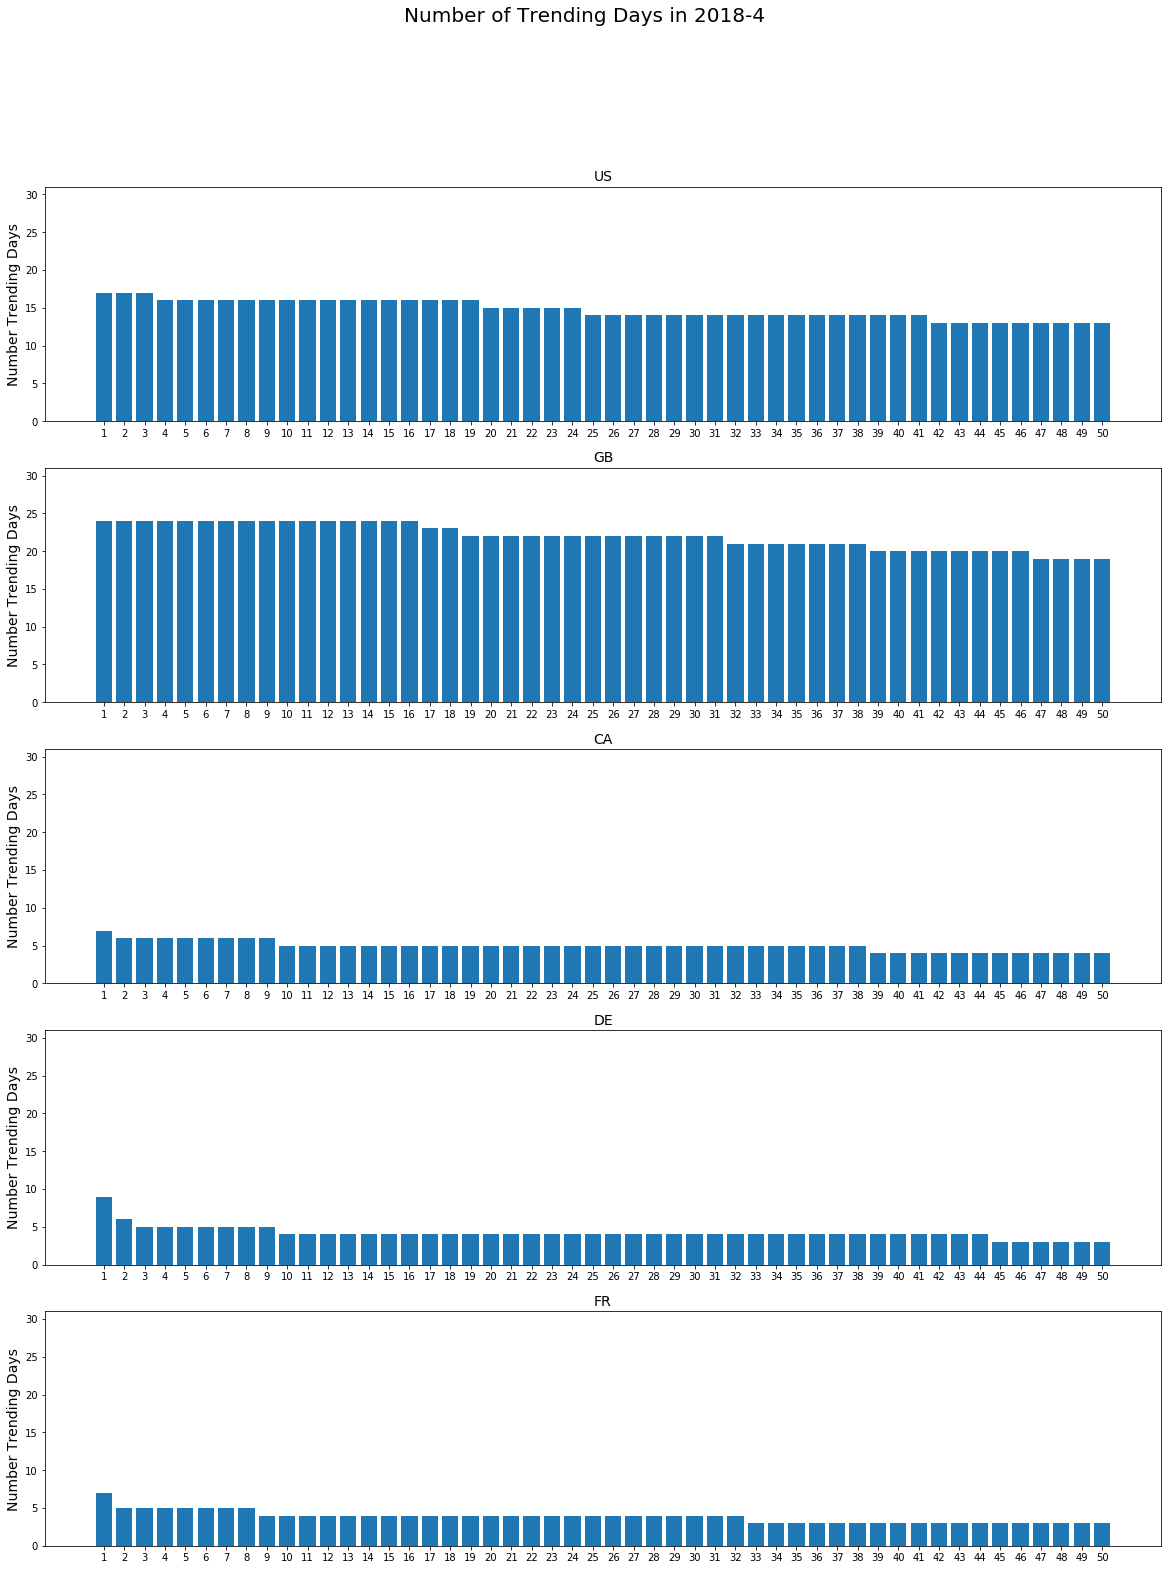

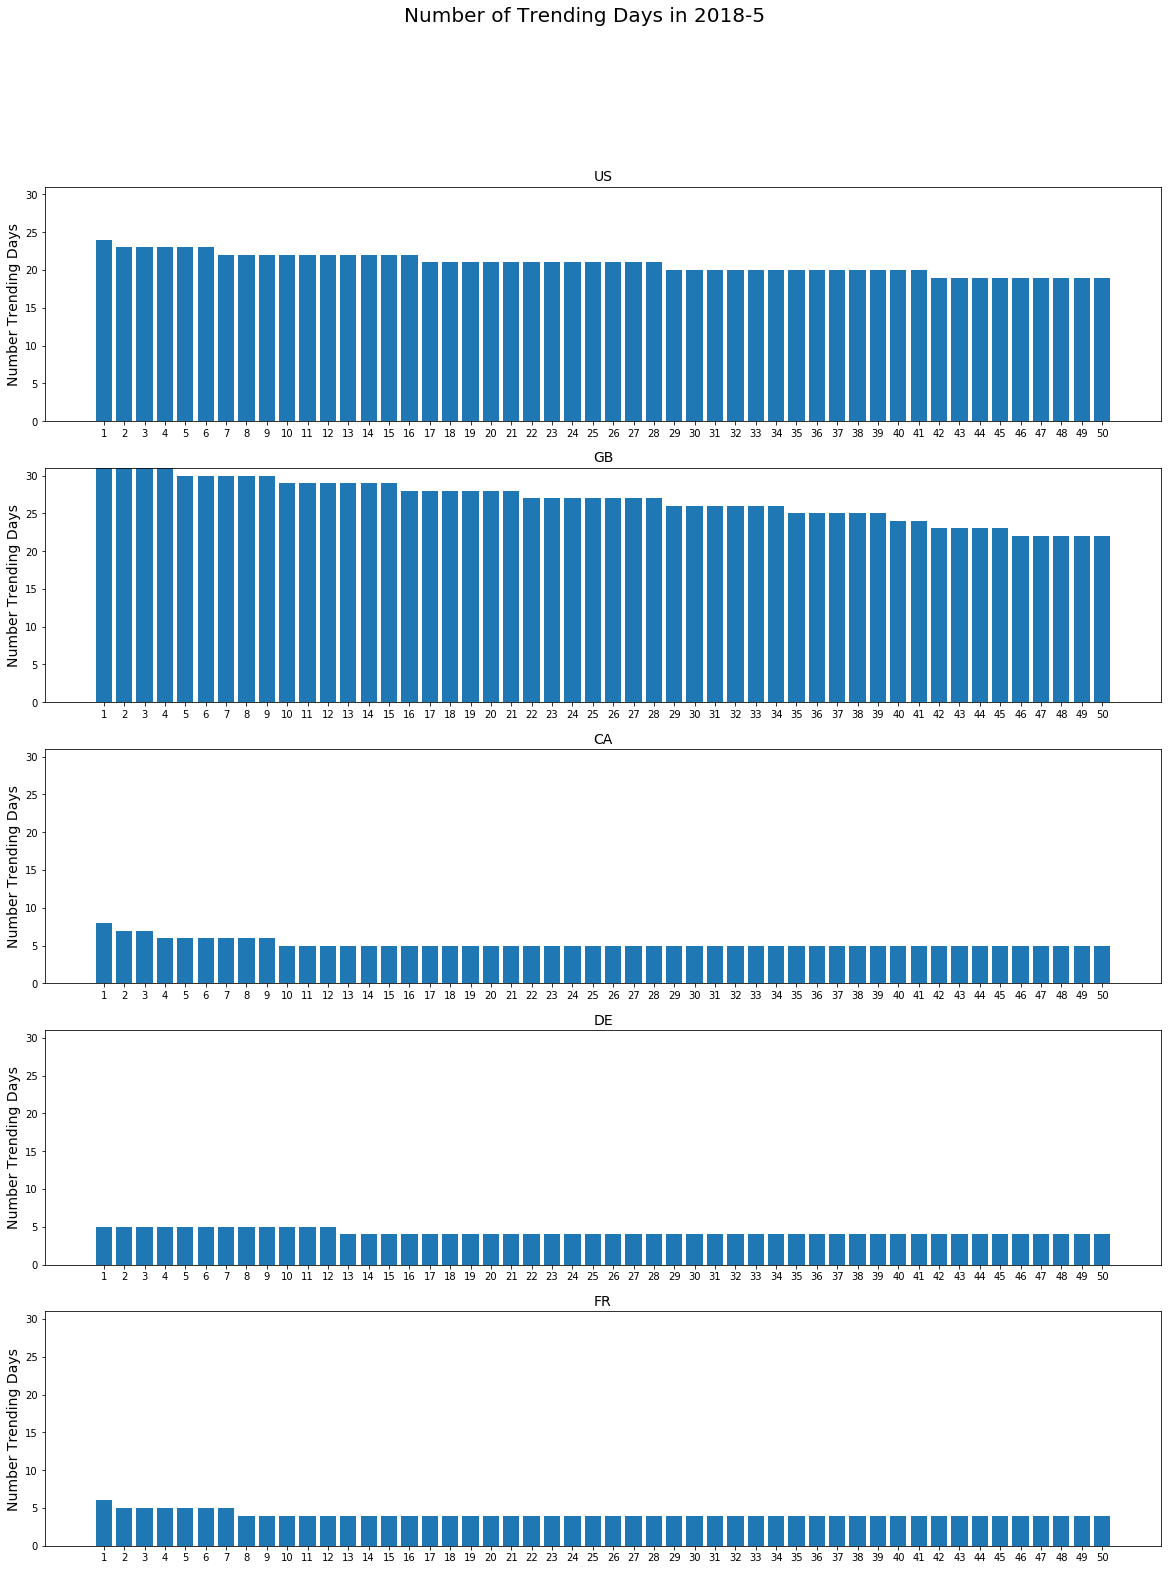

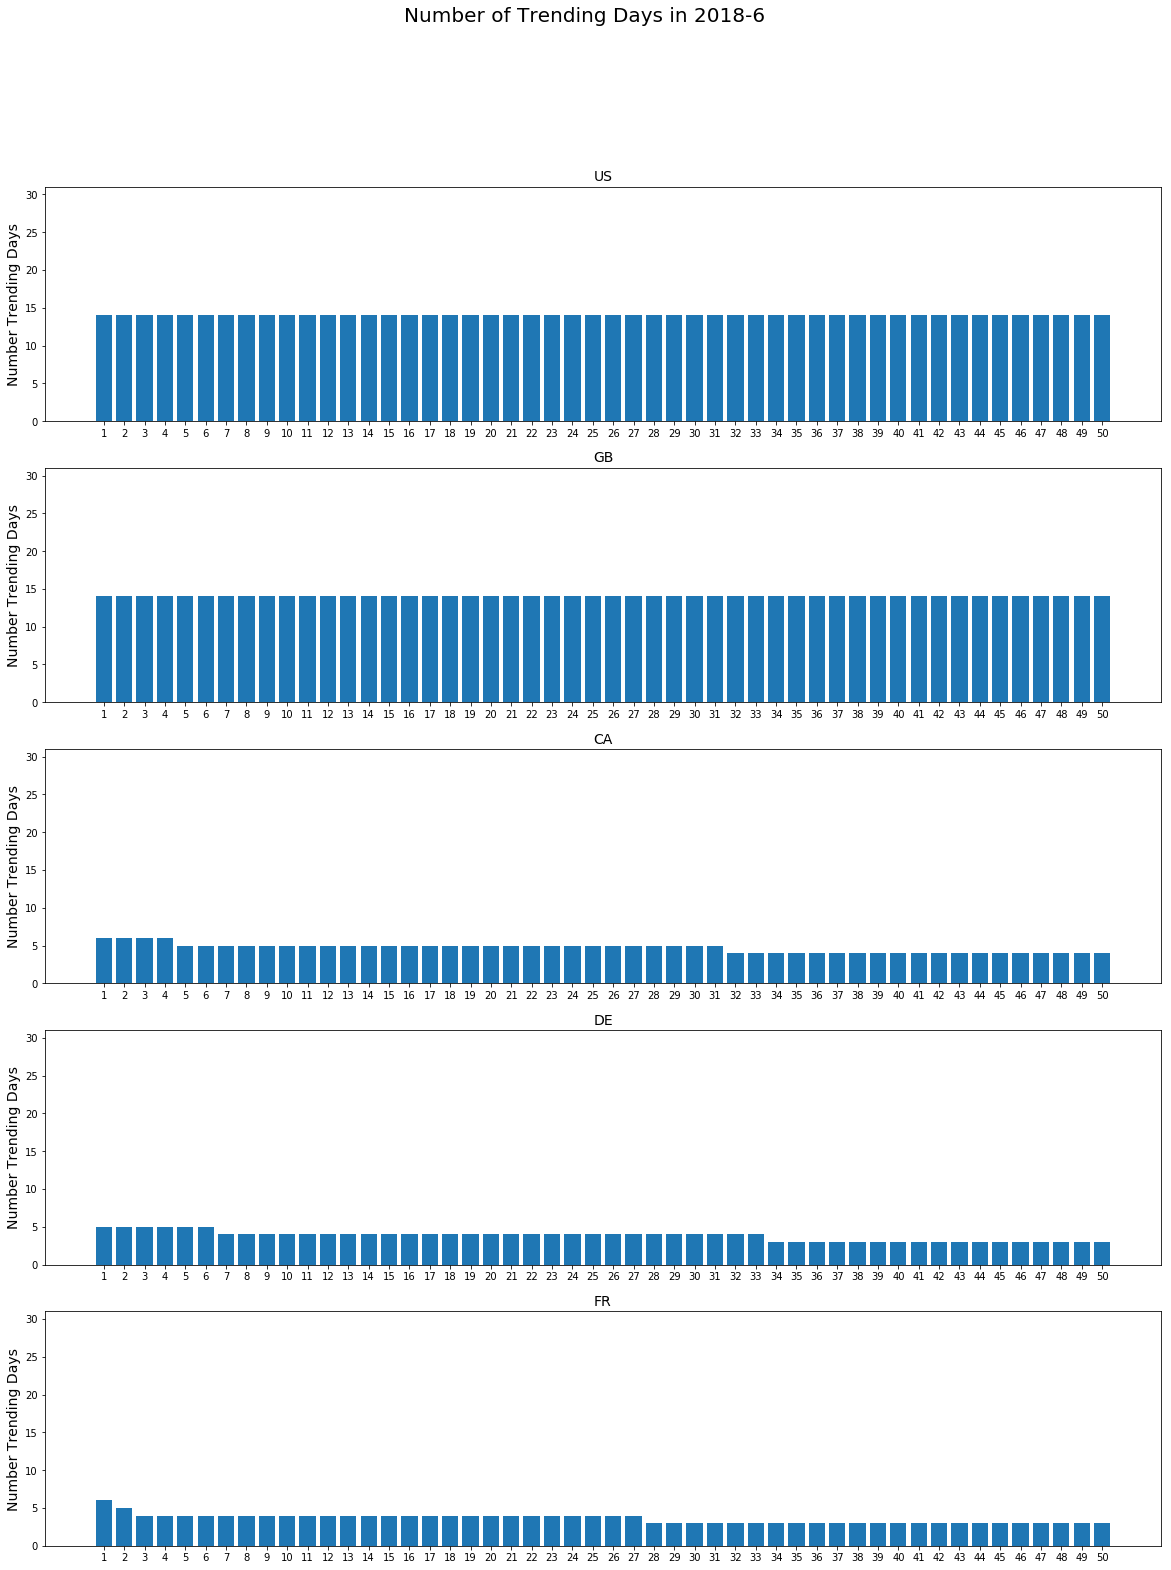

In [9]:
months = ['2017-11','2017-12','2018-1','2018-2','2018-3','2018-4','2018-5','2018-6']
for month in months:
    us = us_top50_byMonth.loc[us_top50_byMonth['trending_YearMonth']==month,:]
    gb = gb_top50_byMonth.loc[gb_top50_byMonth['trending_YearMonth']==month,:]
    ca = ca_top50_byMonth.loc[ca_top50_byMonth['trending_YearMonth']==month,:]
    de = de_top50_byMonth.loc[de_top50_byMonth['trending_YearMonth']==month,:]
    fr = fr_top50_byMonth.loc[fr_top50_byMonth['trending_YearMonth']==month,:]
    plt.figure(figsize=(20,25))
    plt.suptitle(f'Number of Trending Days in {month}', fontsize=20)
    plt.subplot(5,1,1,)
    plt.bar(np.arange(50),us['video_id_count'])
    plt.title('US', fontsize=14)
    plt.xticks(np.arange(50),np.arange(1,51,1))
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days', fontsize=14)
    plt.subplot(5,1,2)
    plt.bar(np.arange(50),gb['video_id_count'])
    plt.title('GB', fontsize=14)
    plt.xticks(np.arange(50),np.arange(1,51,1))
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days', fontsize=14)
    plt.subplot(5,1,3)  
    plt.bar(np.arange(50),ca['video_id_count'])
    plt.title('CA', fontsize=14)
    plt.xticks(np.arange(50),np.arange(1,51,1))
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days', fontsize=14)
    plt.subplot(5,1,4)   
    plt.bar(np.arange(50),de['video_id_count'])
    plt.title('DE', fontsize=14)
    plt.xticks(np.arange(50),np.arange(1,51,1))
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.ylabel('Number Trending Days', fontsize=14)
    plt.subplot(5,1,5)    
    plt.bar(np.arange(50),fr['video_id_count'])
    plt.xticks(np.arange(50),np.arange(1,51,1))
    plt.ylim(0,31)
    plt.yticks(np.arange(0,35,5),[0,5,10,15,20,25,30])
    plt.title('FR', fontsize=14)
    plt.ylabel('Number Trending Days', fontsize=14)
    plt.savefig('Views_{month}.png')

# Category Overlap across countries

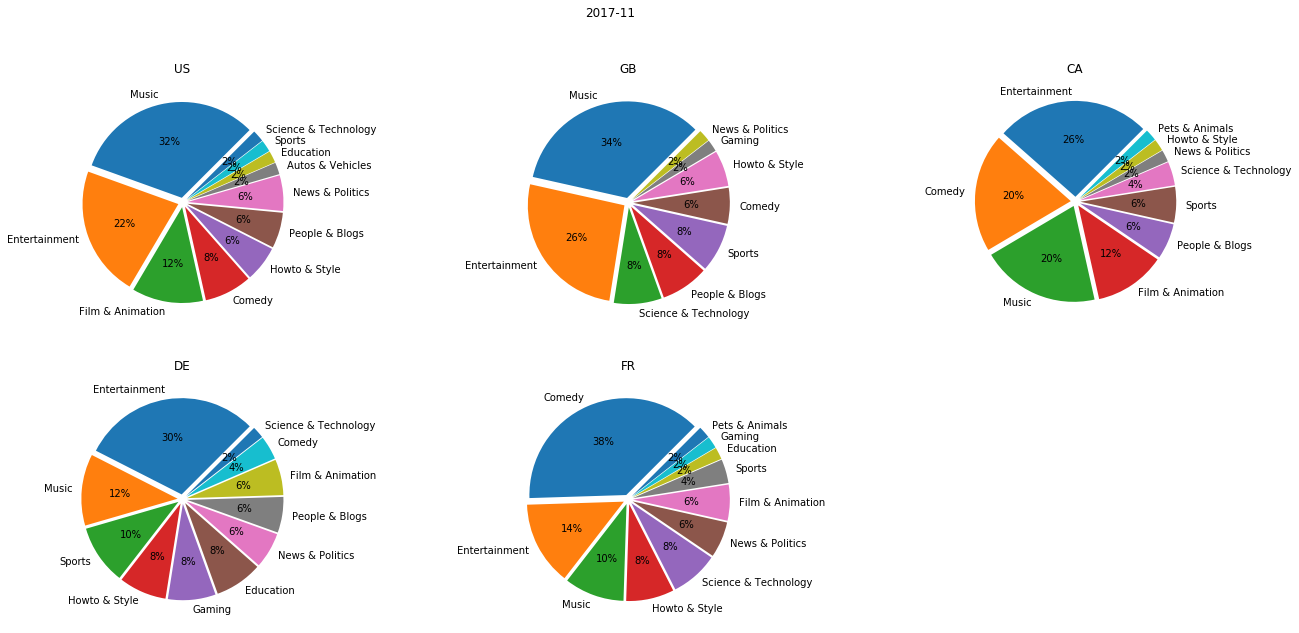

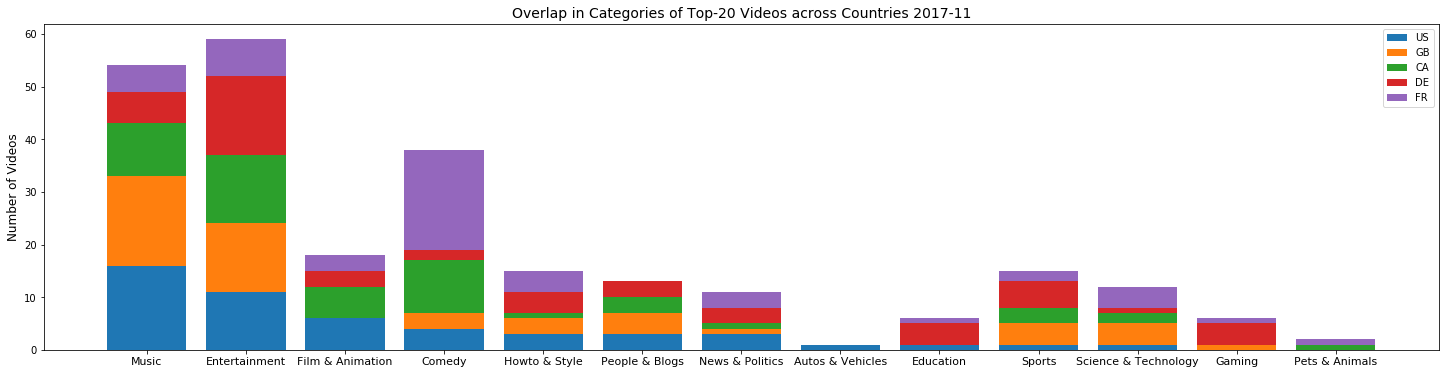

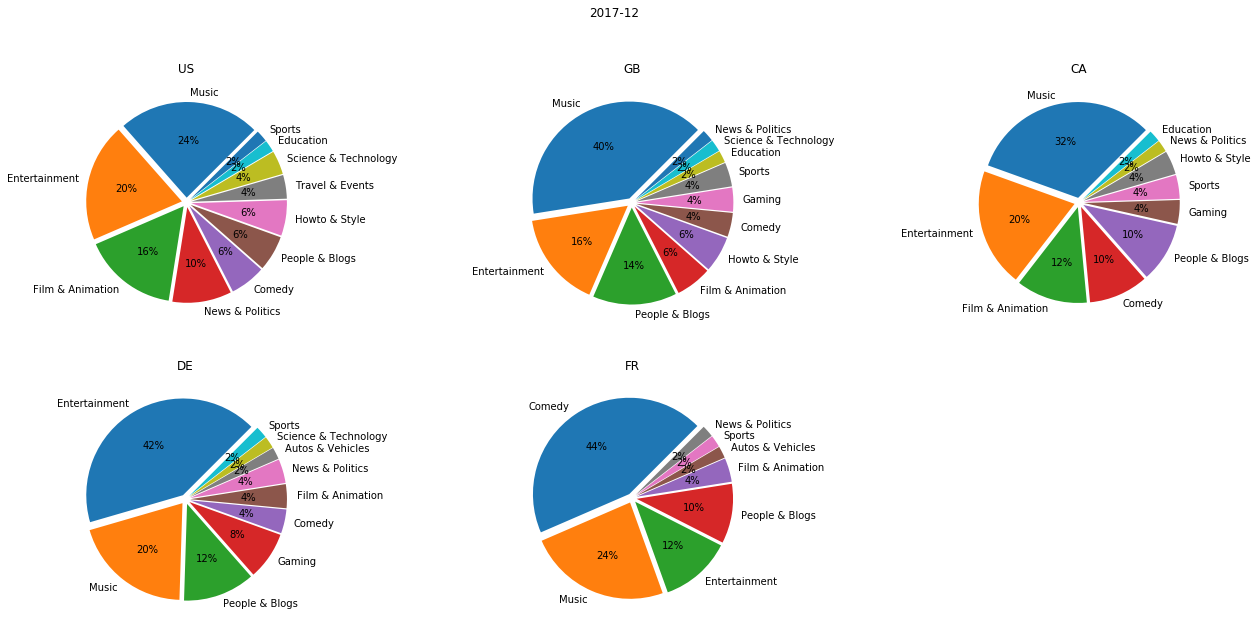

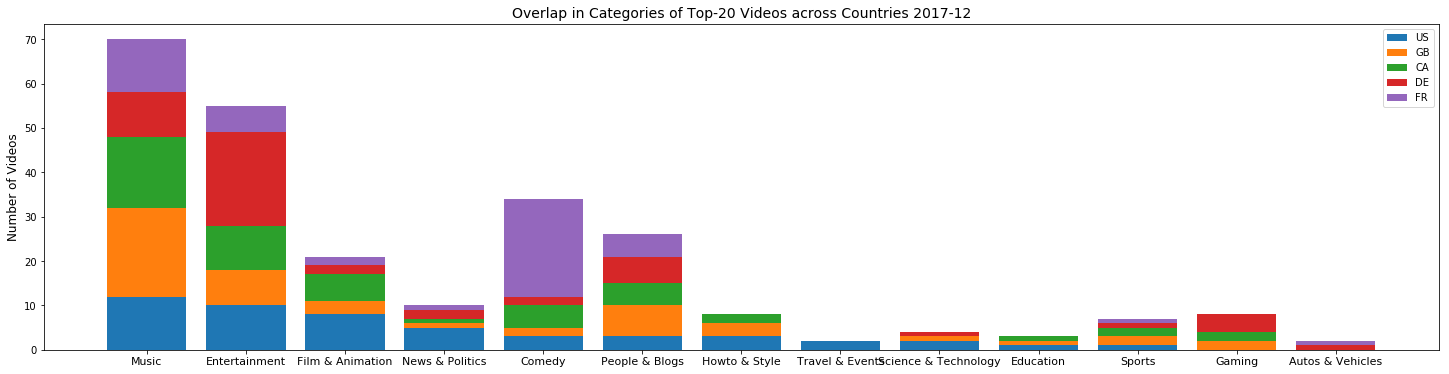

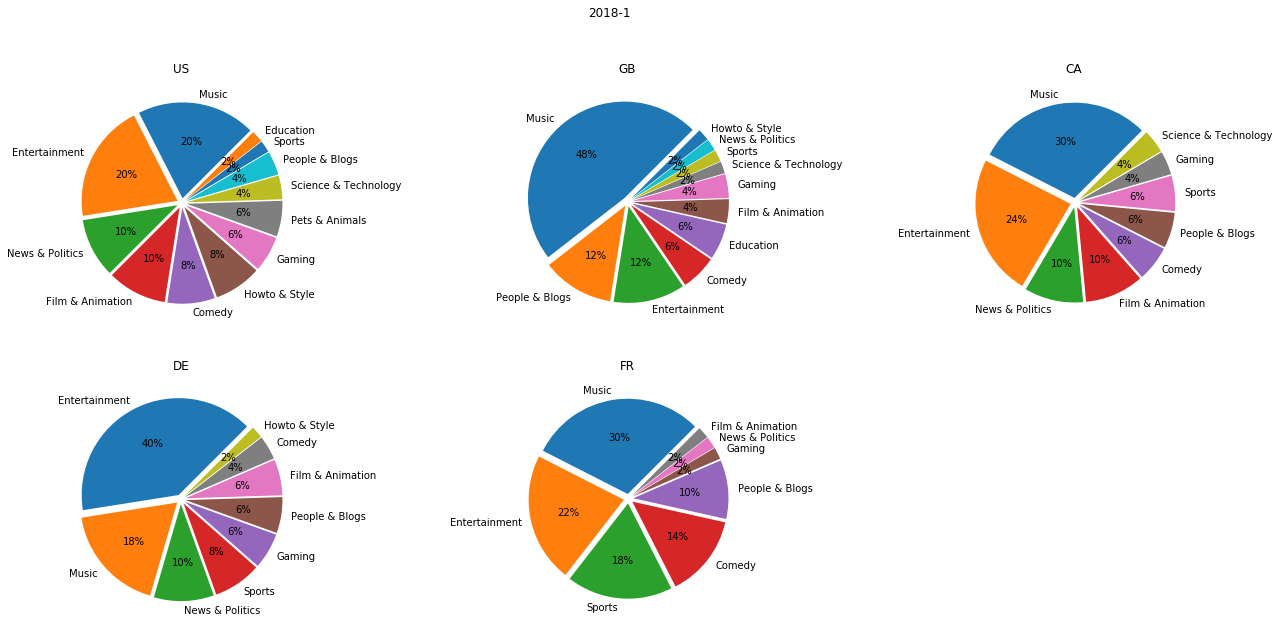

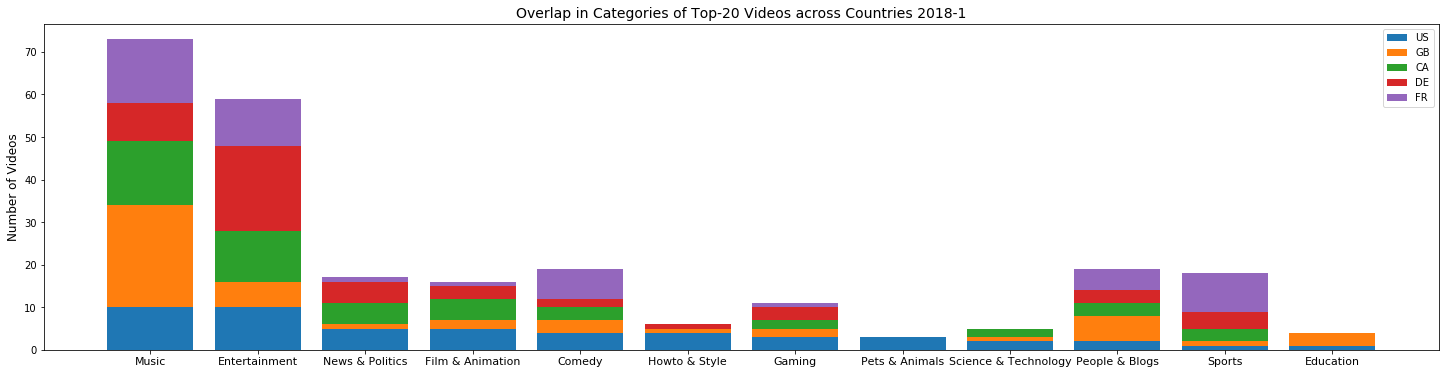

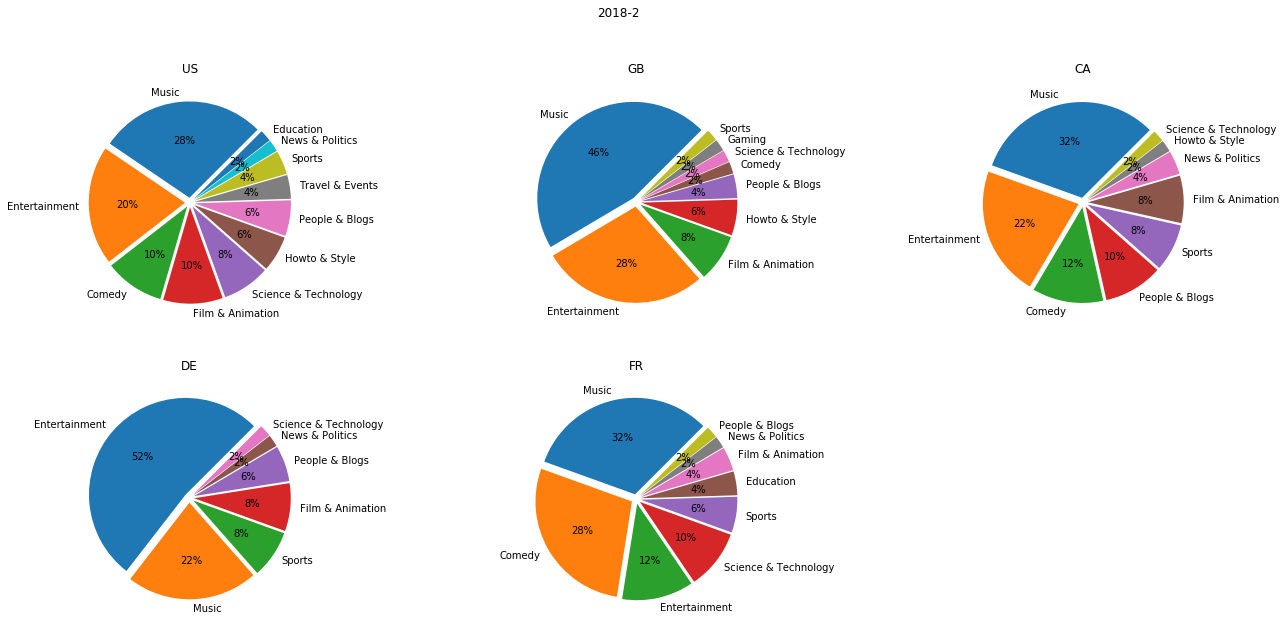

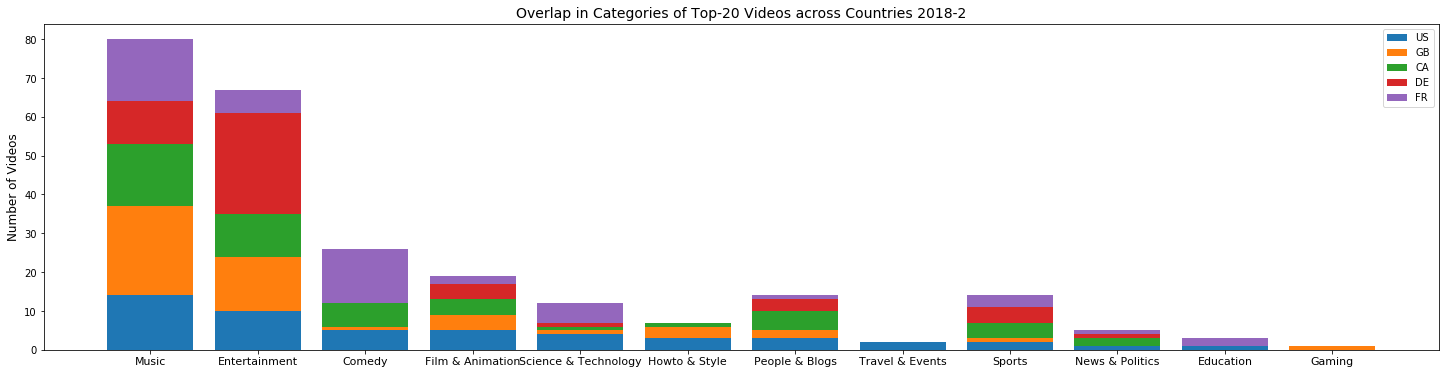

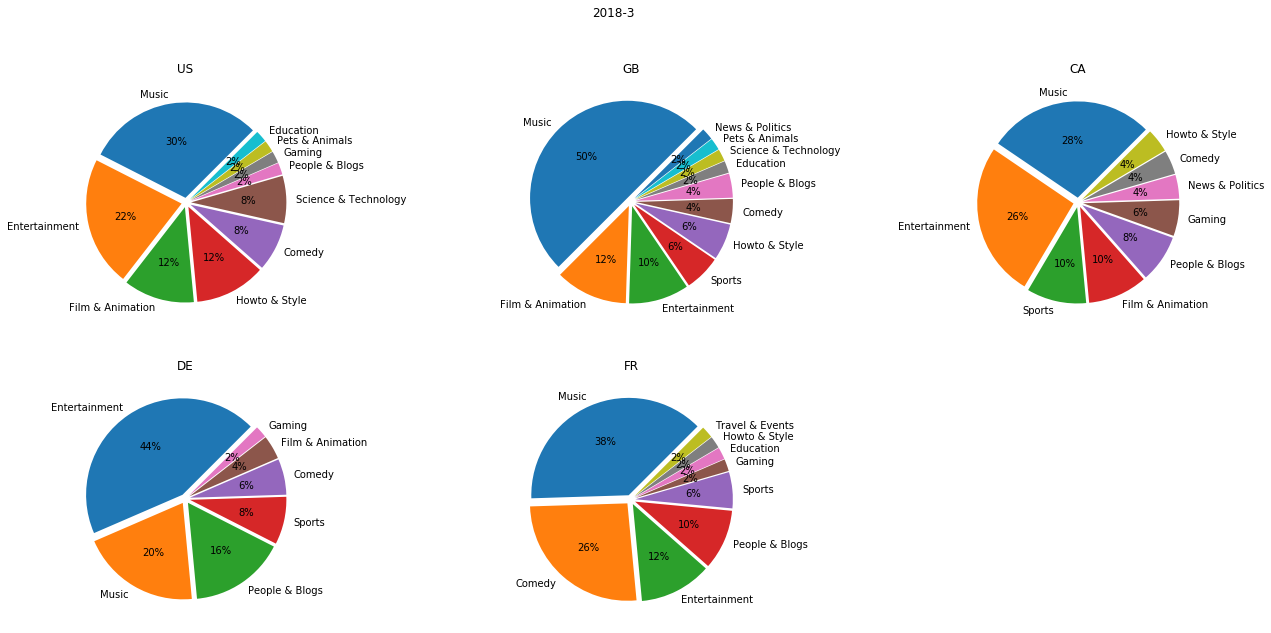

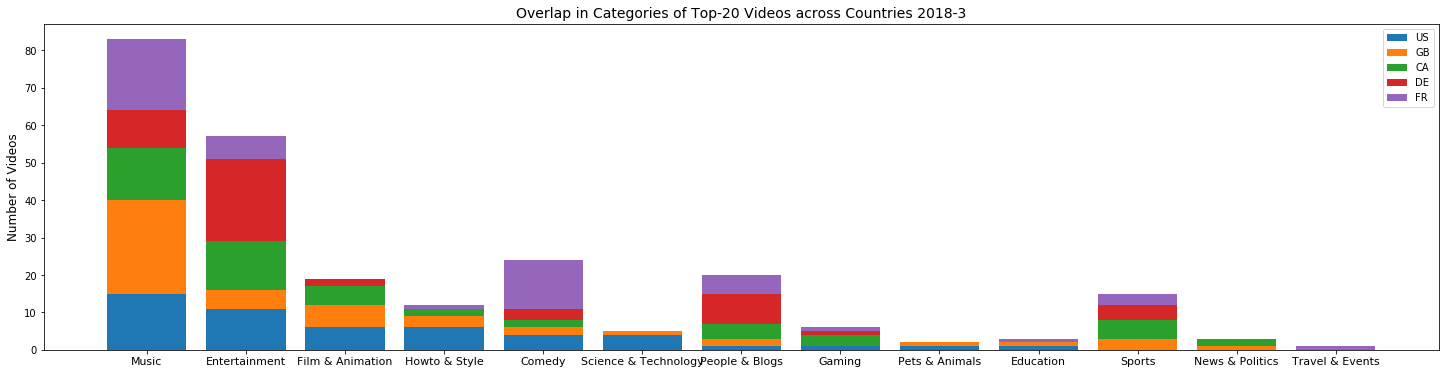

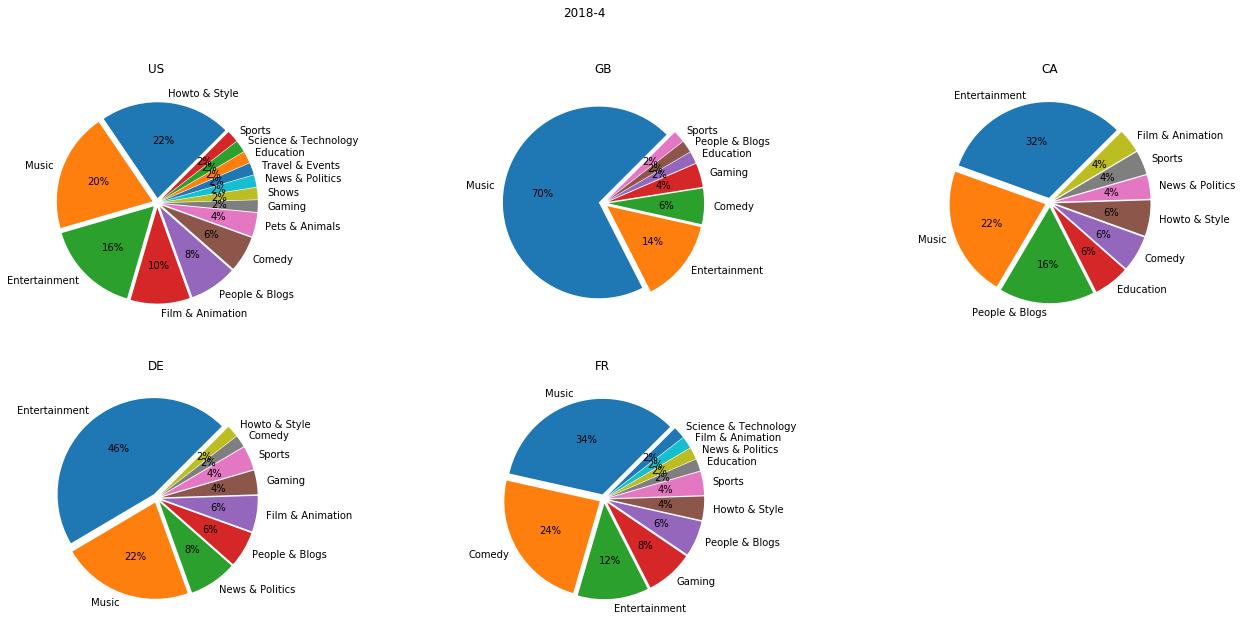

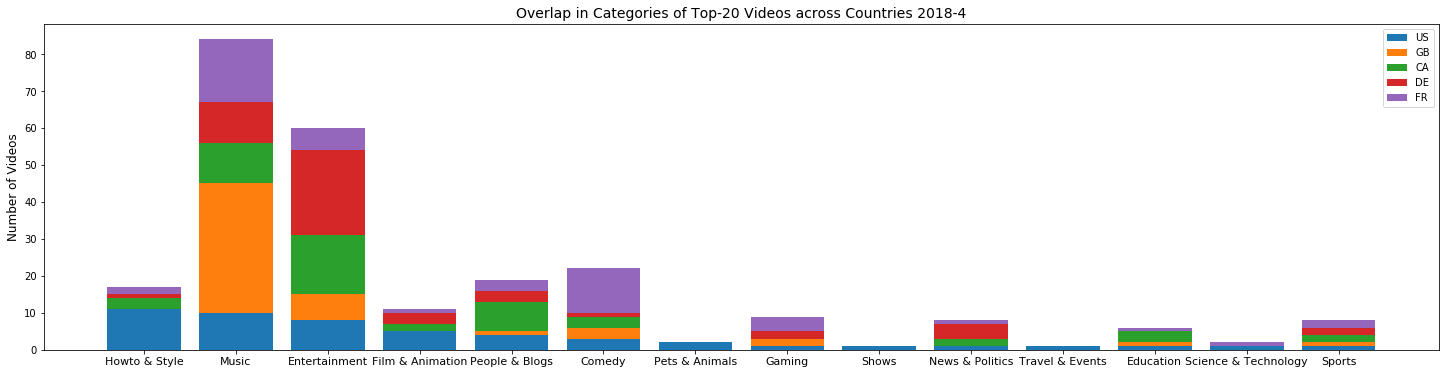

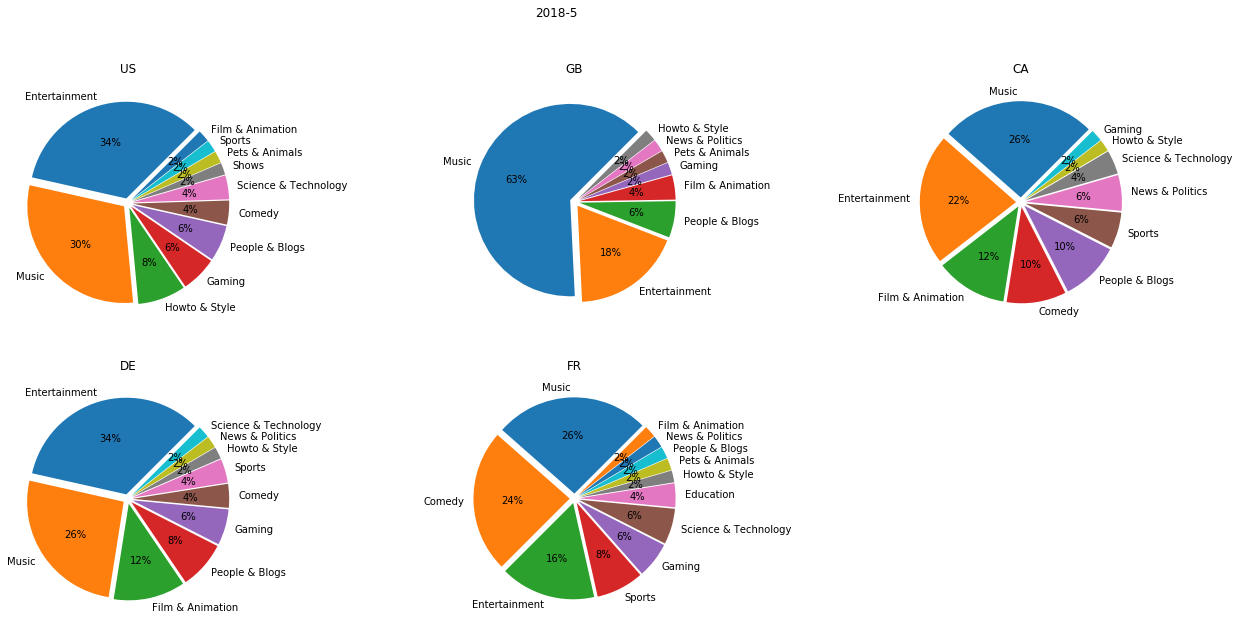

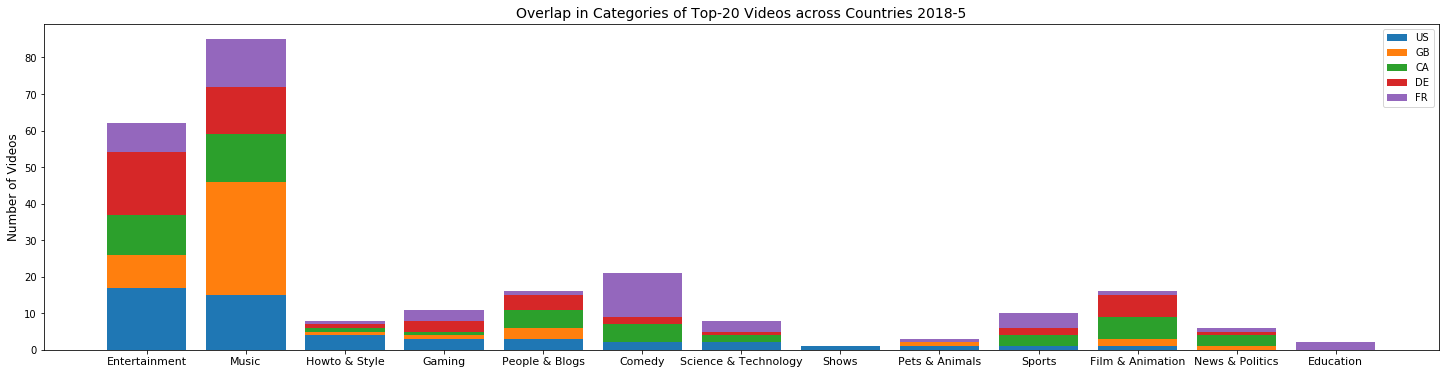

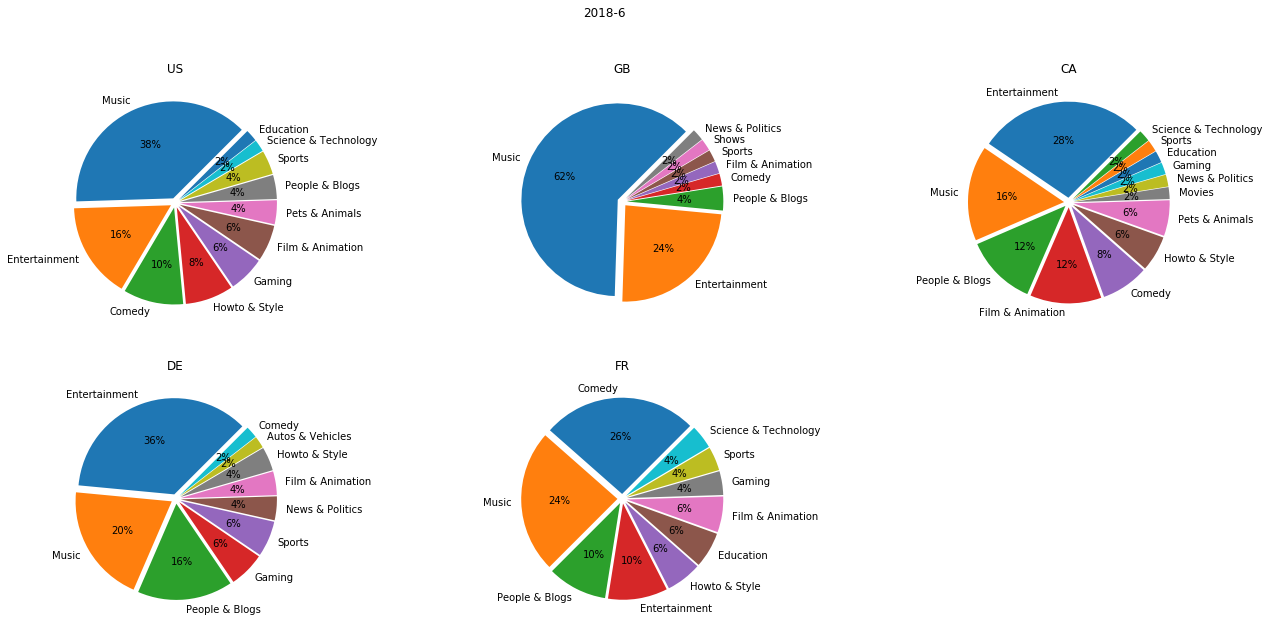

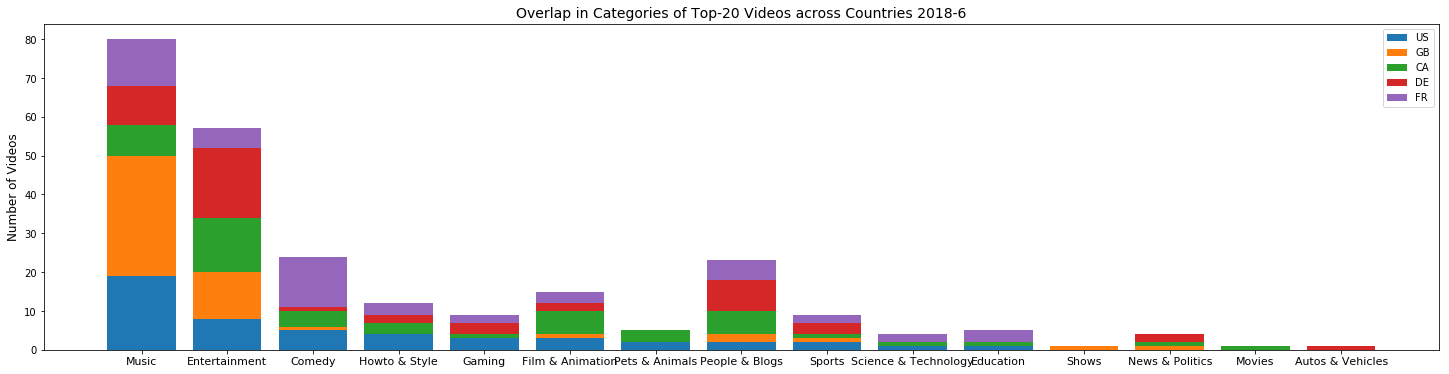

In [10]:
for month in months:
    us_cat = us_top50_byMonth.loc[us_top50_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    gb_cat = gb_top50_byMonth.loc[gb_top50_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    ca_cat = ca_top50_byMonth.loc[ca_top50_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    de_cat = de_top50_byMonth.loc[de_top50_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    fr_cat = fr_top50_byMonth.loc[fr_top50_byMonth['trending_YearMonth'] == month]['category'].value_counts()
    
    # plot pie charts
    plt.figure(figsize=(20,10))
    plt.suptitle(f'{month}')
    plt.subplot(2,3,1)
    plt.pie(us_cat,labels = us_cat.index, explode = [.05 for x in np.arange(len(us_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('US')
    plt.subplot(2,3,2)
    plt.pie(gb_cat,labels = gb_cat.index, explode = [.05 for x in np.arange(len(gb_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('GB')
    plt.subplot(2,3,3)
    plt.pie(ca_cat,labels = ca_cat.index, explode = [.05 for x in np.arange(len(ca_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('CA')
    plt.subplot(2,3,4)
    plt.pie(de_cat,labels = de_cat.index, explode = [.05 for x in np.arange(len(de_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('DE')
    plt.subplot(2,3,5)
    plt.pie(fr_cat,labels = fr_cat.index, explode = [.05 for x in np.arange(len(fr_cat))], autopct = '%.0f%%', startangle = 45)
    plt.axis('equal')
    plt.title('FR')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
    plt.savefig(f"Pie_{month}.png")
    
    # plot stacked bar charts
    unique_cats = us_cat.index.append(gb_cat.index).append(ca_cat.index).append(de_cat.index).append(fr_cat.index).unique()
    cats = {}
    for key in unique_cats:
        cats[key]=0
    us_dict = us_cat.to_dict()
    us_cats = cats.copy()
    for item in us_dict:
        us_cats[item]=us_cats[item]+us_dict[item]

    gb_dict = gb_cat.to_dict()
    gb_cats = cats.copy()
    for item in gb_dict:
        gb_cats[item]=gb_cats[item]+gb_dict[item] 

    ca_dict = ca_cat.to_dict()
    ca_cats = cats.copy()
    for item in ca_dict:
        ca_cats[item]=ca_cats[item]+ca_dict[item] 

    de_dict = de_cat.to_dict()
    de_cats = cats.copy()
    for item in de_dict:
        de_cats[item]=de_cats[item]+de_dict[item] 
        
    fr_dict = fr_cat.to_dict()
    fr_cats = cats.copy()
    for item in fr_dict:
        fr_cats[item]=fr_cats[item]+fr_dict[item] 
    
    plt.figure(figsize = (25,6))
    p1= plt.bar(us_cats.keys(),us_cats.values())
    plt.ylabel("Number of Videos", fontsize = 12)
    plt.xticks(list(us_cats.keys()),fontsize = 11)
    plt.title(f"Overlap in Categories of Top-20 Videos across Countries {month}", fontsize = 14)
    bottom_us = list(us_cats.values())
    p2 = plt.bar(gb_cats.keys(),gb_cats.values(), bottom=bottom_us)
    bottom_gb = list(gb_cats.values())
    bottom_us_gb = [sum(x) for x in zip(bottom_us,bottom_gb)]
    p3 = plt.bar(ca_cats.keys(),ca_cats.values(), bottom=bottom_us_gb)
    bottom_ca = list(ca_cats.values())
    bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb,bottom_ca)]
    p4 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
    bottom_de = list(de_cats.values())
    bottom_us_gb_ca_de = [sum(x) for x in zip(bottom_us_gb_ca,bottom_de)]
    p5 = plt.bar(fr_cats.keys(),fr_cats.values(), bottom=bottom_us_gb_ca_de)
    plt.legend((p1,p2,p3,p4,p5),("US",'GB','CA','DE','FR'))
    plt.savefig(f"stacked_bar_{month}.png")

# Video overlap rates across countries

No Significant Difference


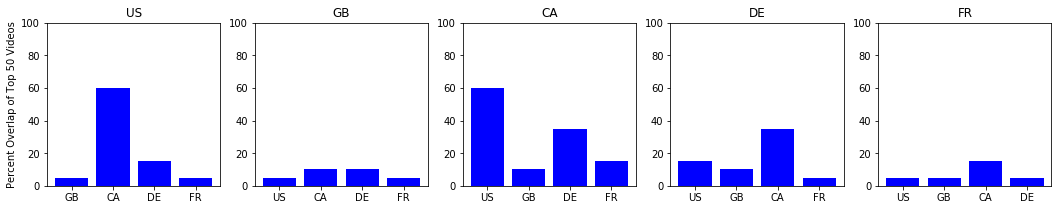

No Significant Difference


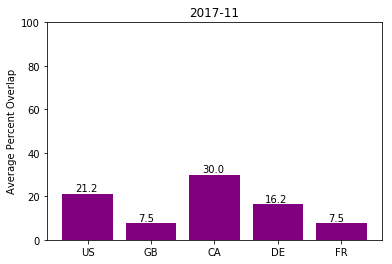

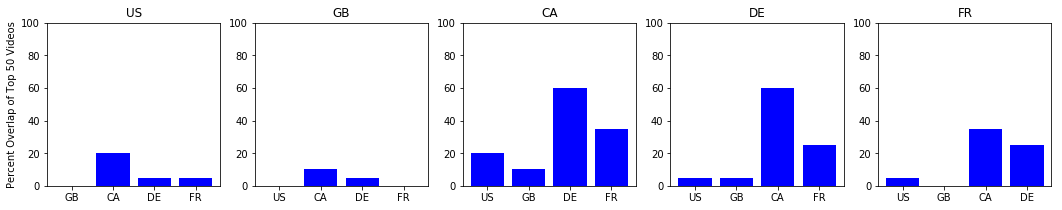

No Significant Difference


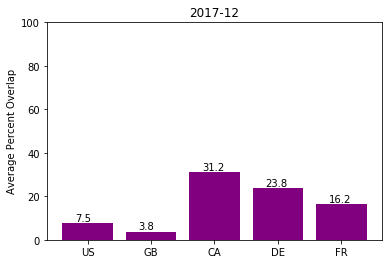

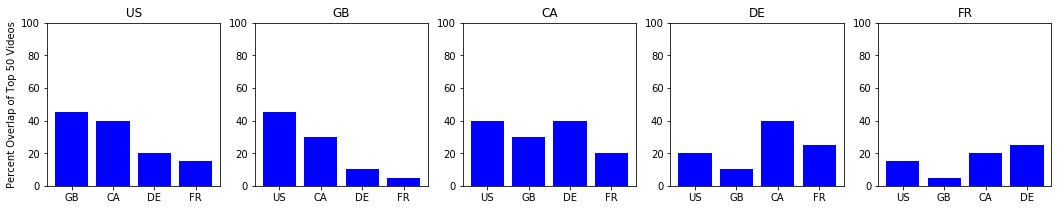

No Significant Difference


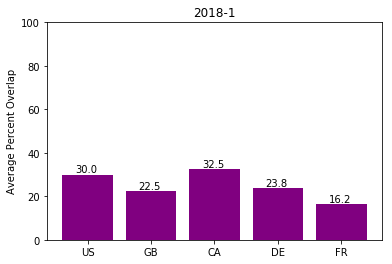

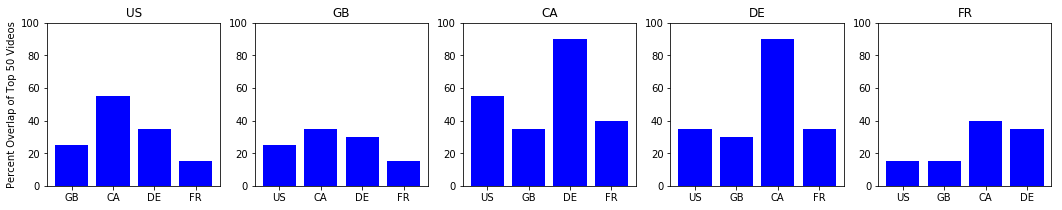

No Significant Difference


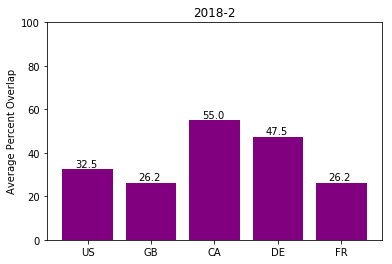

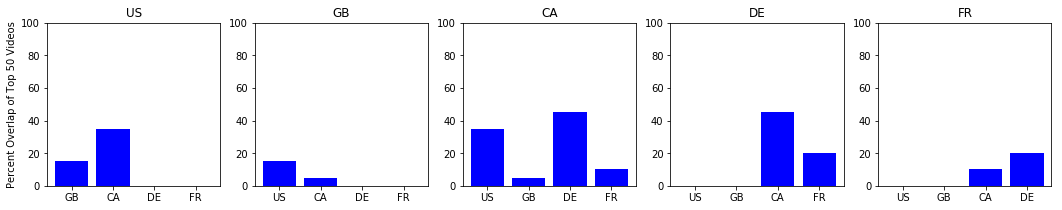

No Significant Difference


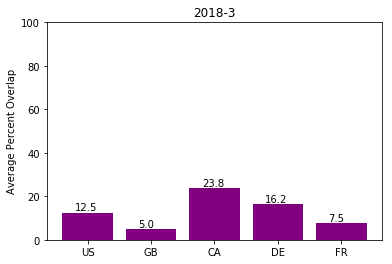

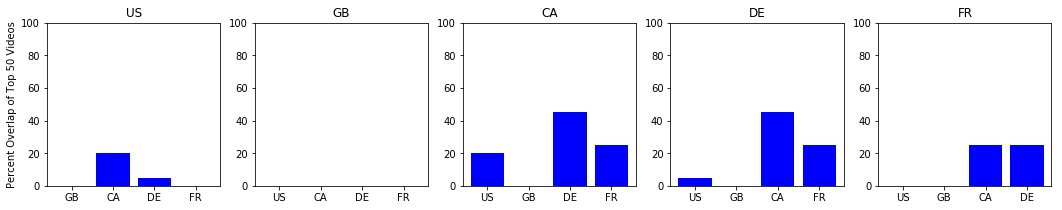

No Significant Difference


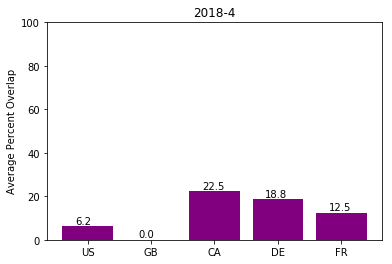

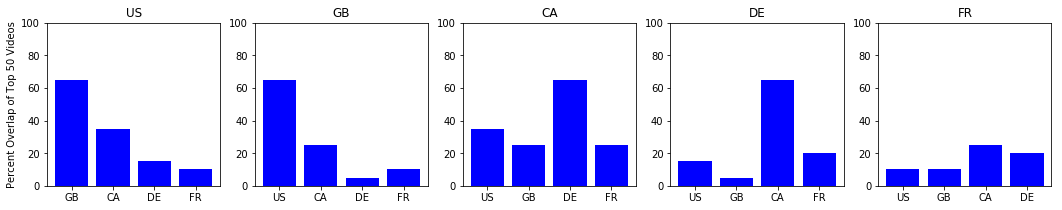

No Significant Difference


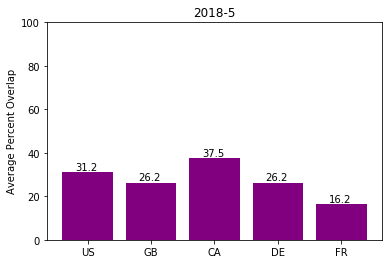

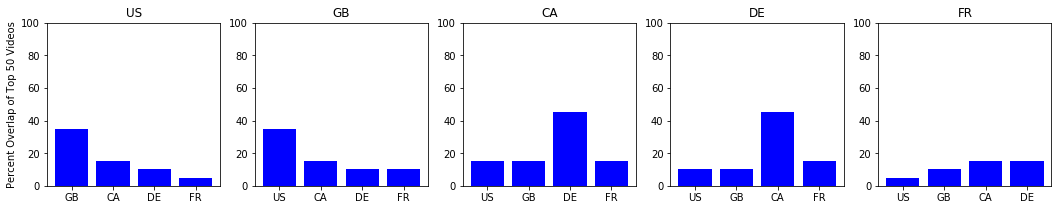

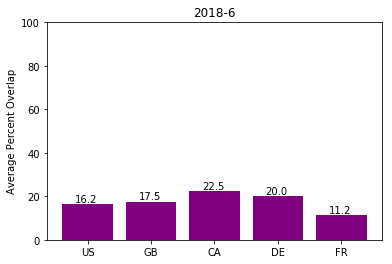

In [11]:
for month in months:
    us_title = us_top50_byMonth.loc[us_top50_byMonth['trending_YearMonth'] == month]['title']
    gb_title = gb_top50_byMonth.loc[gb_top50_byMonth['trending_YearMonth'] == month]['title']
    ca_title = ca_top50_byMonth.loc[ca_top50_byMonth['trending_YearMonth'] == month]['title']
    de_title = de_top50_byMonth.loc[de_top50_byMonth['trending_YearMonth'] == month]['title']
    fr_title = fr_top50_byMonth.loc[fr_top50_byMonth['trending_YearMonth'] == month]['title']

    count = 0
    for item in gb_title:
        if item in list(us_title):
            count = count + 1
    us_gb_overlap = int(count/20*100)
    
    
    count = 0
    for item in ca_title:
        if item in list(us_title):
            count = count + 1
    us_ca_overlap = int(count/20*100)
 
    
    count = 0
    for item in de_title:
        if item in list(us_title):
            count = count + 1
    us_de_overlap = int(count/20*100)

    count = 0
    for item in fr_title:
        if item in list(us_title):
            count = count + 1
    us_fr_overlap = int(count/20*100)

    count = 0
    for item in ca_title:
        if item in list(gb_title):
            count = count + 1
    gb_ca_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(gb_title):
            count = count + 1
    gb_de_overlap = int(count/20*100)
    
    count = 0
    for item in fr_title:
        if item in list(gb_title):
            count = count + 1
    gb_fr_overlap = int(count/20*100)

    count = 0
    for item in de_title:
        if item in list(ca_title):
            count = count + 1
    ca_de_overlap = int(count/20*100)
    
    count = 0
    for item in fr_title:
        if item in list(ca_title):
            count = count + 1
    ca_fr_overlap = int(count/20*100)
    
    count = 0
    for item in fr_title:
        if item in list(de_title):
            count = count + 1
    de_fr_overlap = int(count/20*100)
        
    
    countries = ['US','GB','CA','DE','FR']
    us_overlaps = [us_gb_overlap,us_ca_overlap,us_de_overlap,us_fr_overlap]
    us_mean = np.mean(us_overlaps)
    gb_overlaps = [us_gb_overlap,gb_ca_overlap,gb_de_overlap,gb_fr_overlap]
    gb_mean = np.mean(gb_overlaps)
    ca_overlaps = [us_ca_overlap,gb_ca_overlap,ca_de_overlap,ca_fr_overlap]
    ca_mean = np.mean(ca_overlaps)
    de_overlaps = [us_de_overlap,gb_de_overlap,ca_de_overlap,de_fr_overlap]
    de_mean = np.mean(de_overlaps)
    fr_overlaps = [us_fr_overlap,gb_fr_overlap,ca_fr_overlap,de_fr_overlap]
    fr_mean = np.mean(fr_overlaps)
    
    anova_test = stats.f_oneway(us_overlaps, gb_overlaps, ca_overlaps, de_overlaps, fr_overlaps)
    p_value = list(anova_test)[1]
    if p_value <= .05:
        overlap = us_overlaps + gb_overlaps + ca_overlaps + de_overlaps + fr_overlaps
        country = 'us '*4+'gb '*4+'ca '*4+'de '*4+'fr '*4
        country = country.split(' ')
        country = country[:-1]
        df = pd.DataFrame({'Overlap': overlap, 
                          'Countries': country})
        mc = MultiComparison(df['Overlap'],df['Countries'])
        result = mc.tukeyhsd()
        print(f'Post Hoc Analysis for {month}: {result}')
    else:
        print('No Significant Difference')
        
    
    plt.figure(figsize = (18,3))
    plt.subplot(1,5,1)
    plt.bar(x= ['GB','CA','DE','FR'],height=us_overlaps,color='blue')
    plt.ylim(0,100)
    plt.ylabel("Percent Overlap of Top 50 Videos")
    plt.title("US")
    plt.subplot(1,5,2)
    plt.bar(x=['US','CA','DE','FR'],height=gb_overlaps,color='blue')
    plt.title("GB")
    plt.ylim(0,100)
    plt.subplot(1,5,3)
    plt.bar(x=['US','GB','DE','FR'],height=ca_overlaps,color='blue')
    plt.title("CA")
    plt.ylim(0,100)
    plt.subplot(1,5,4)
    plt.bar(x=['US','GB','CA','FR'],height=de_overlaps,color='blue')
    plt.title("DE")
    plt.ylim(0,100)
    plt.subplot(1,5,5)
    plt.bar(x=['US','GB','CA','DE'],height=fr_overlaps,color='blue')
    plt.title("FR")
    plt.ylim(0,100)
    plt.show()
    plt.bar(countries,height=[us_mean,gb_mean,ca_mean,de_mean,fr_mean],color='purple')
    plt.ylabel("Average Percent Overlap")
    plt.title(f'{month}')
    plt.ylim(0,100)
    plt.annotate(f'{us_mean:.1f}',xy=(0-.2,us_mean +1))
    plt.annotate(f'{gb_mean:.1f}',xy=(1-.2,gb_mean +1))
    plt.annotate(f'{ca_mean:.1f}',xy=(2-.2,ca_mean +1))
    plt.annotate(f'{de_mean:.1f}',xy=(3-.2,de_mean +1))
    plt.annotate(f'{fr_mean:.1f}',xy=(4-.2,fr_mean +1))
    plt.savefig(f'Overlap_rate_{month}.png')
    

# Video Overlap Scatter Plots

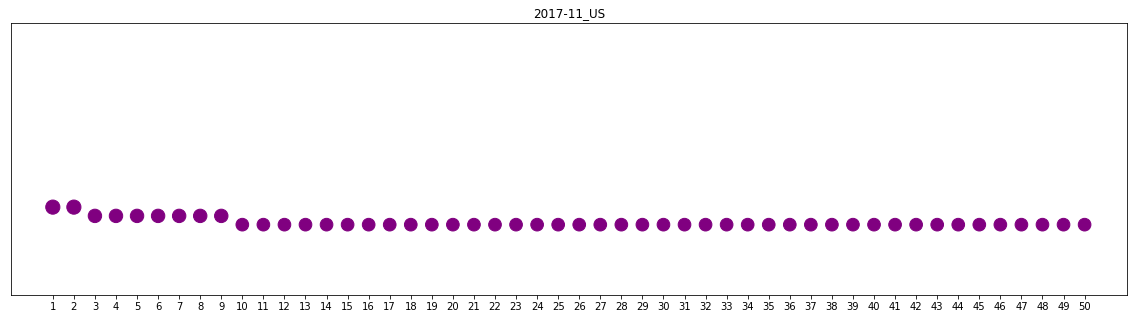

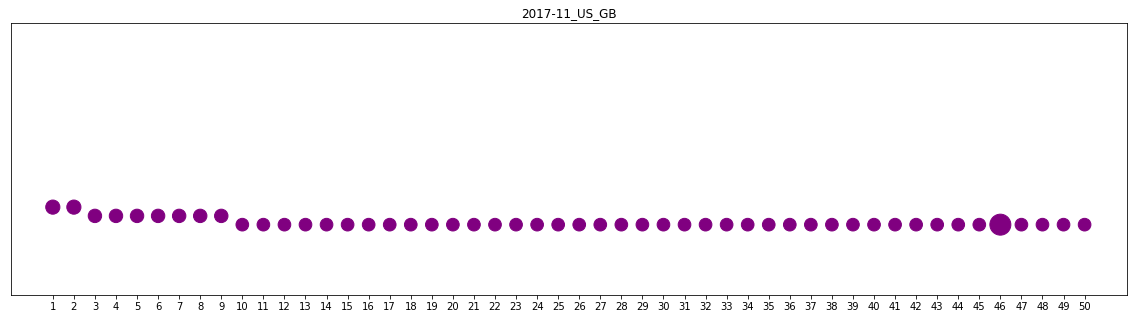

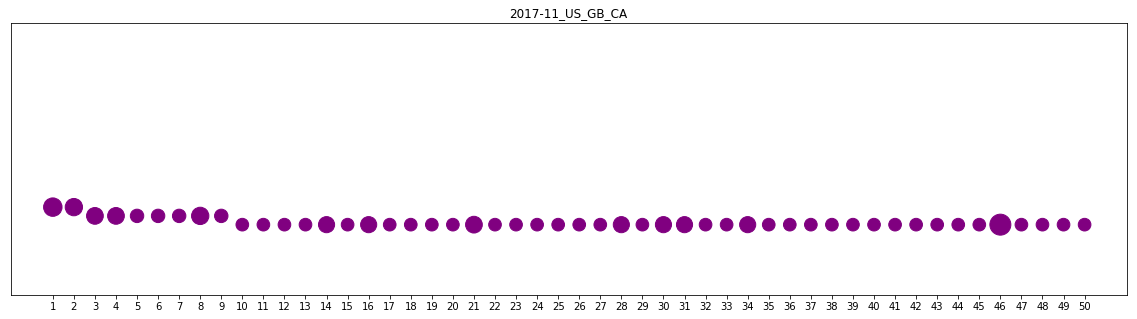

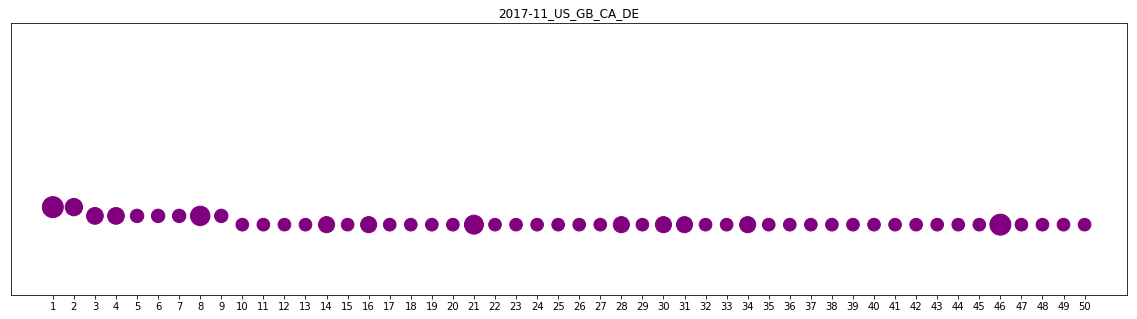

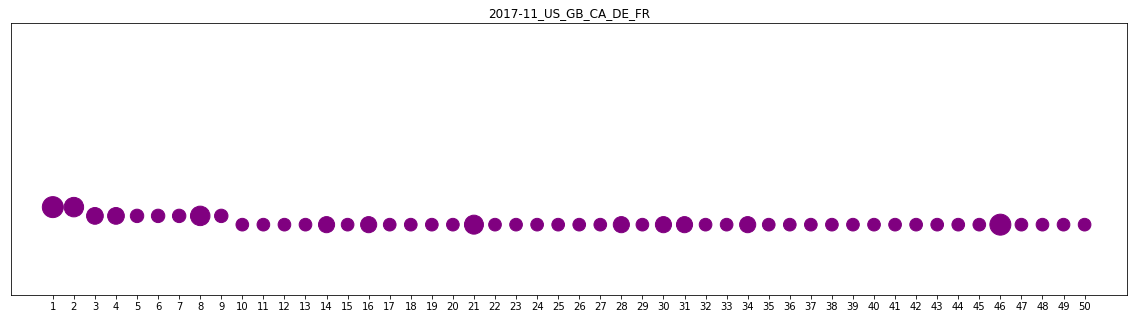

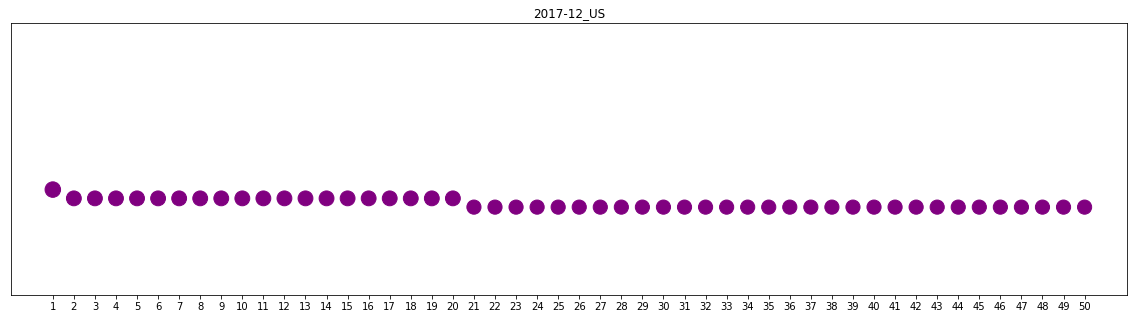

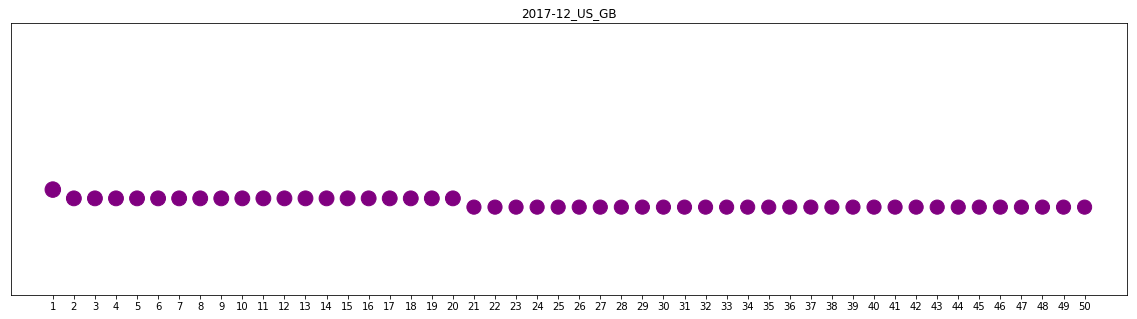

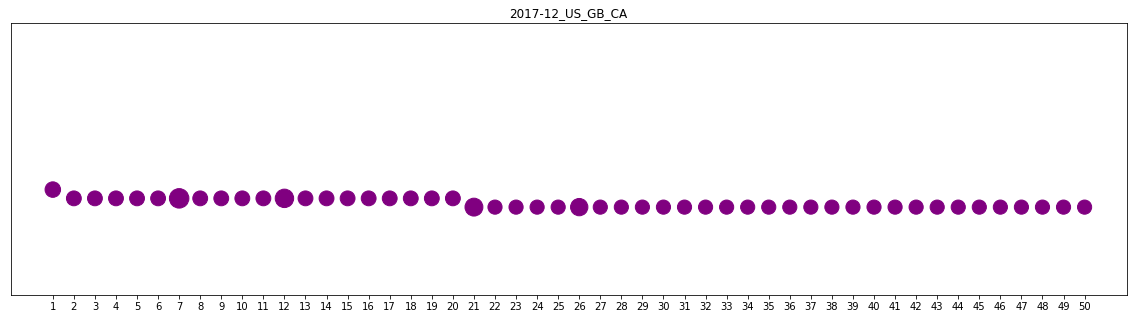

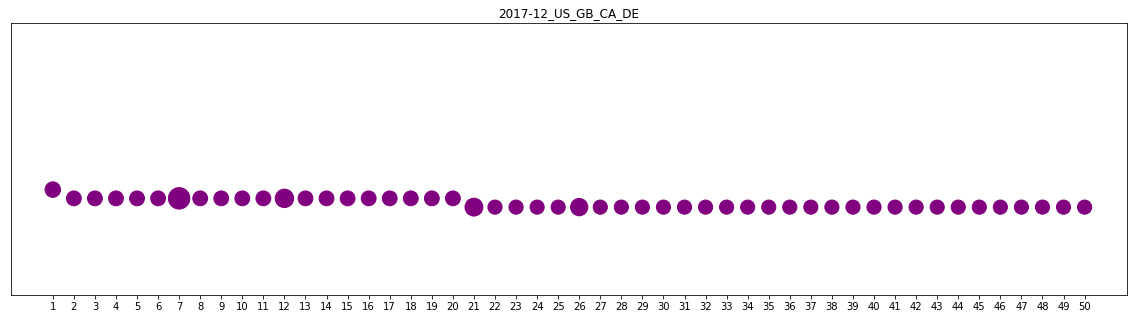

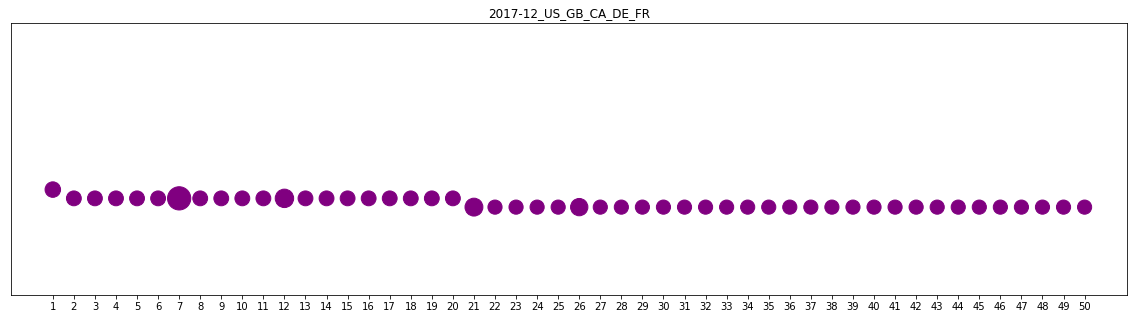

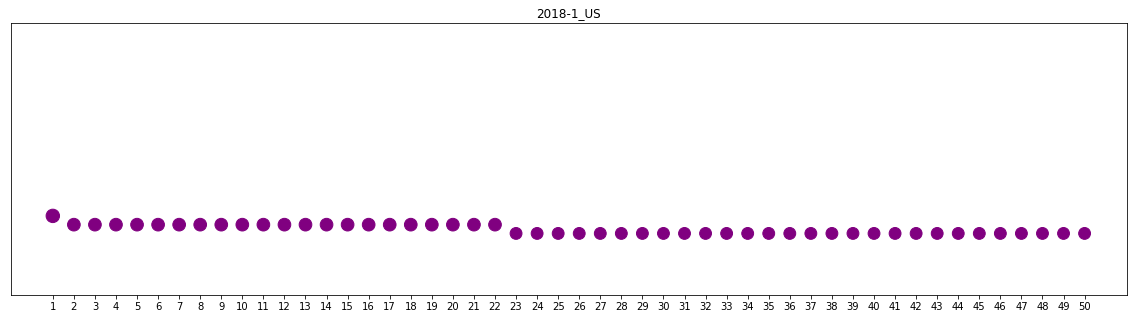

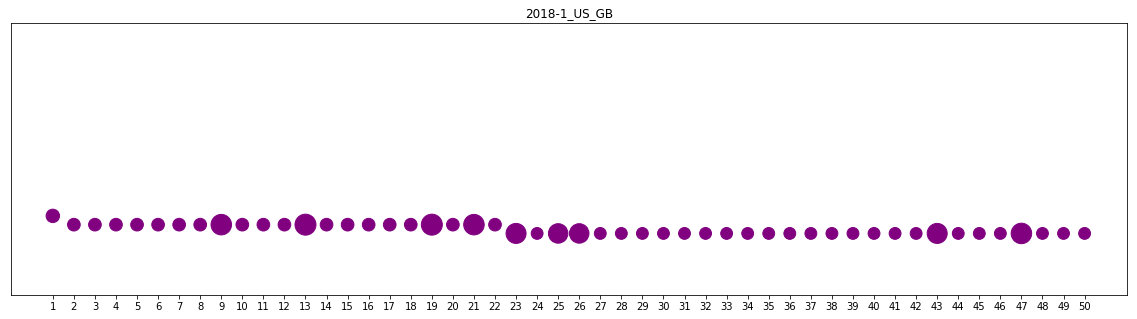

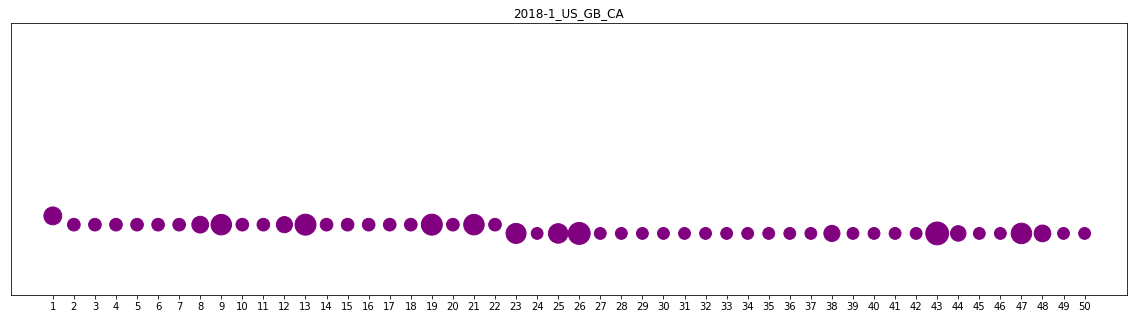

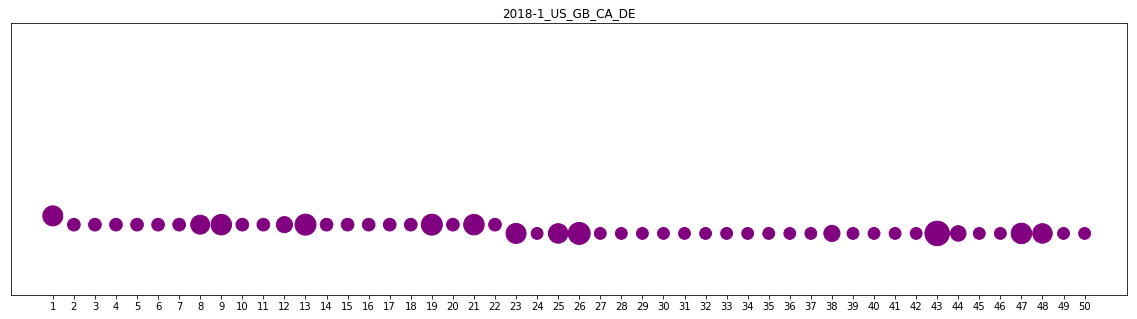

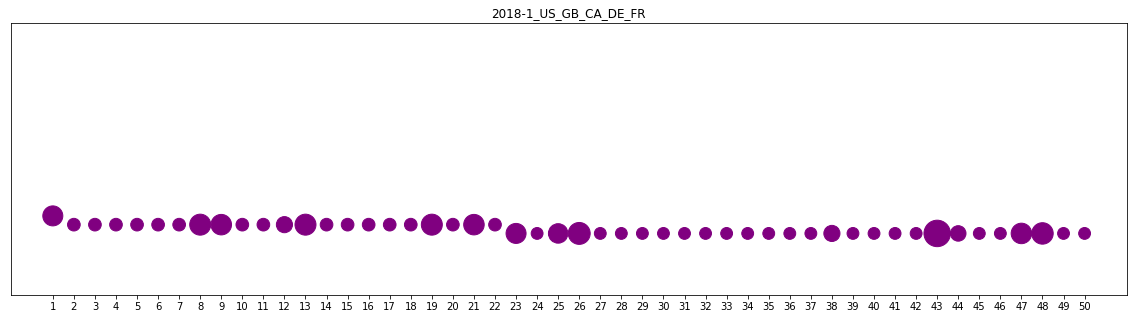

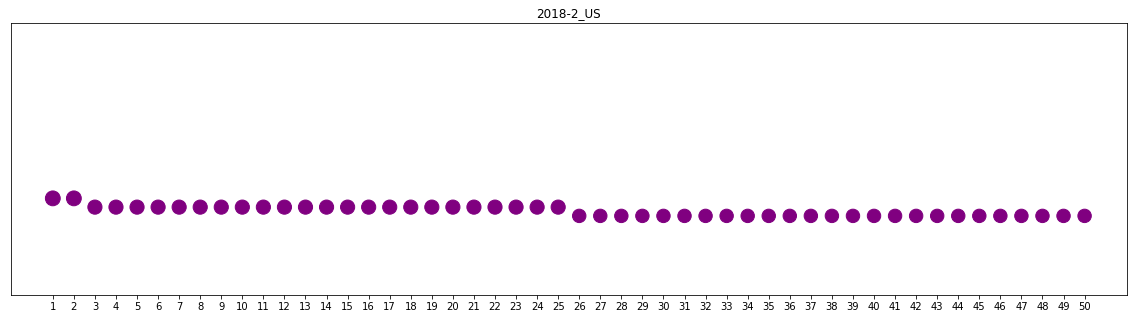

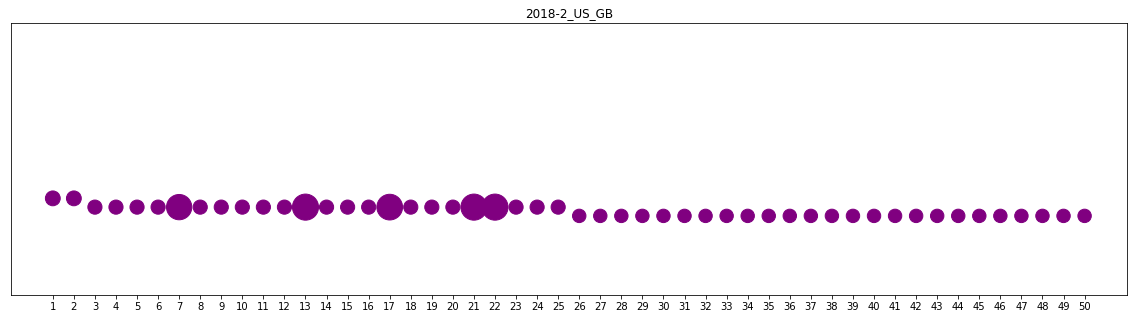

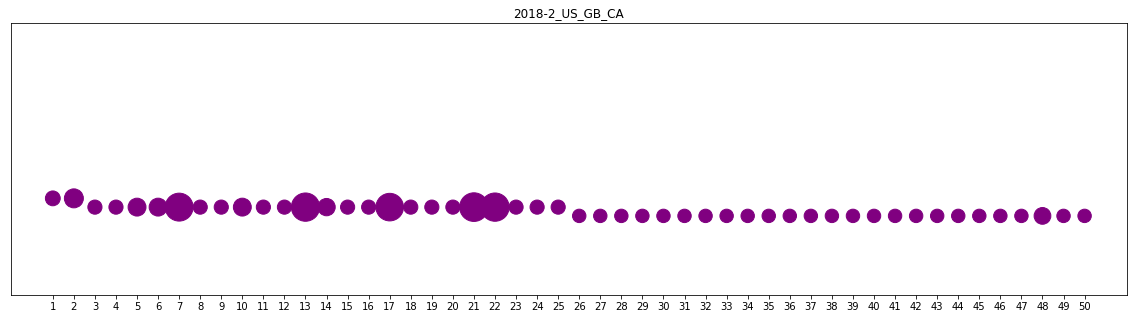

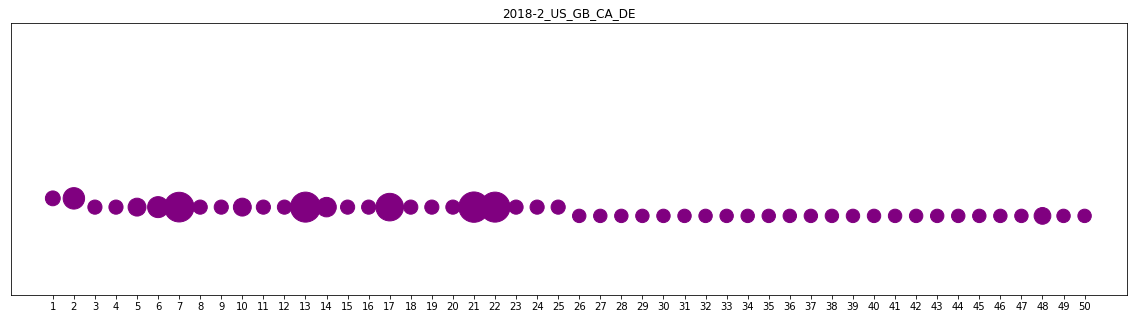

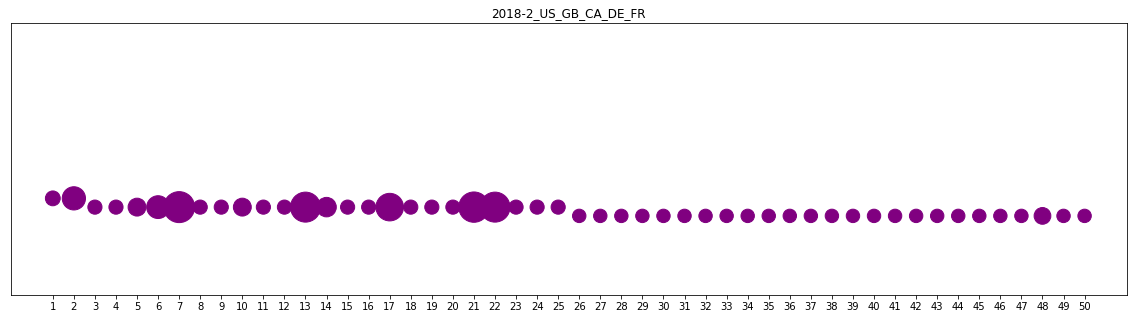

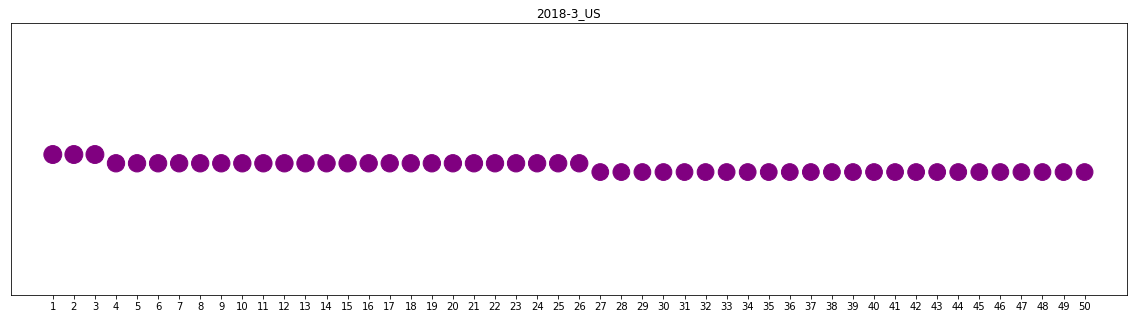

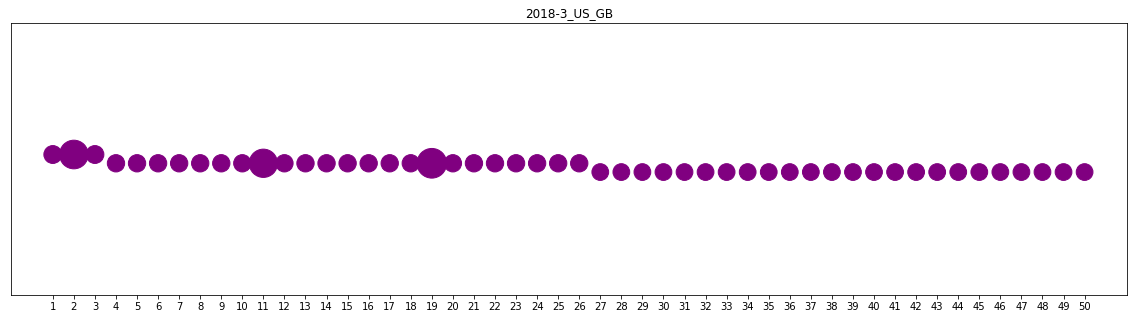

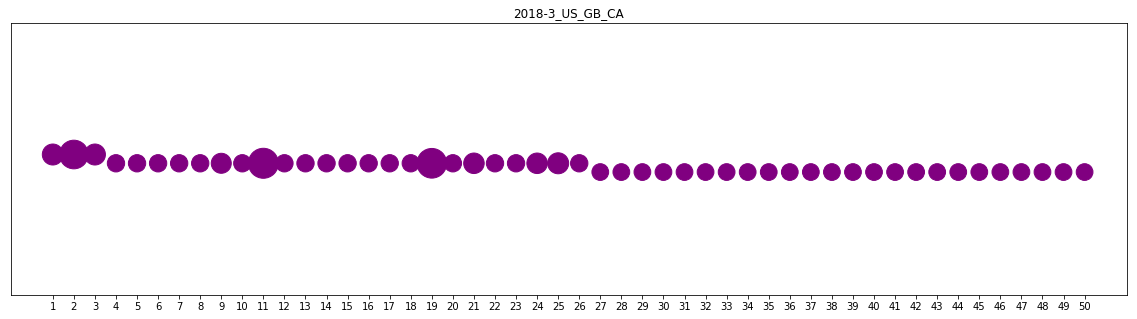

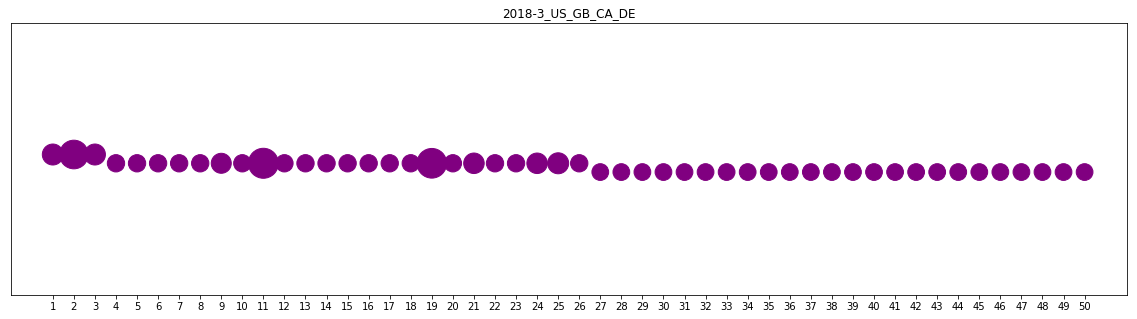

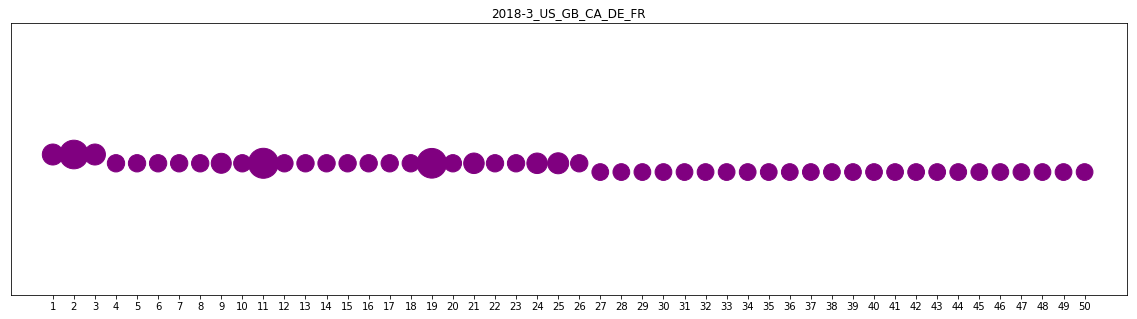

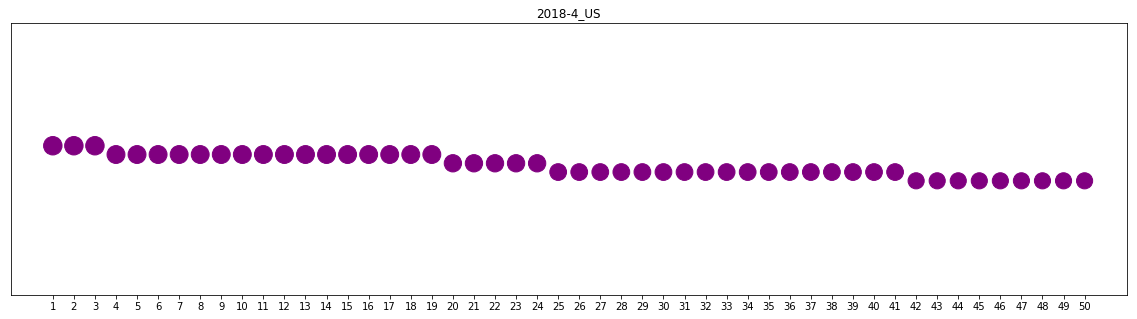

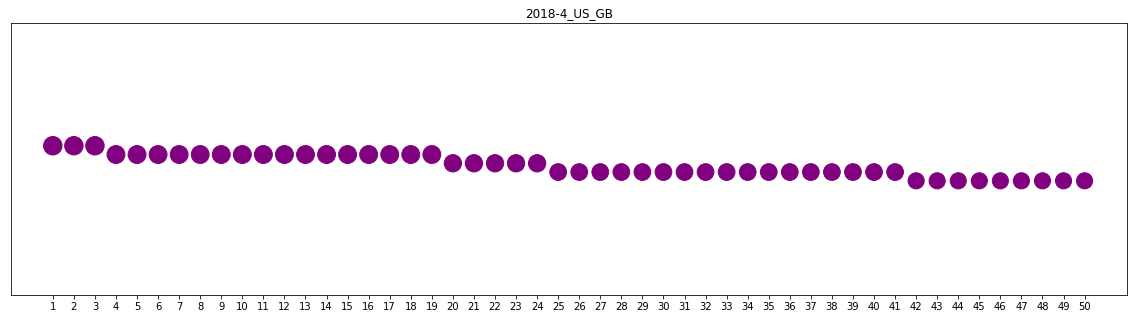

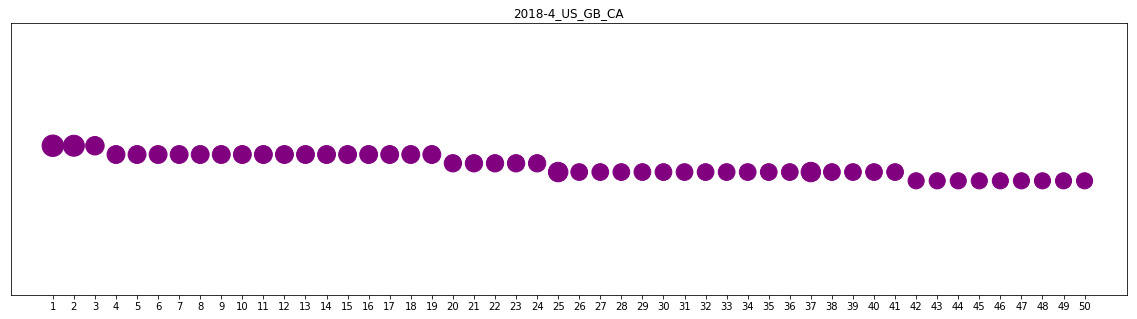

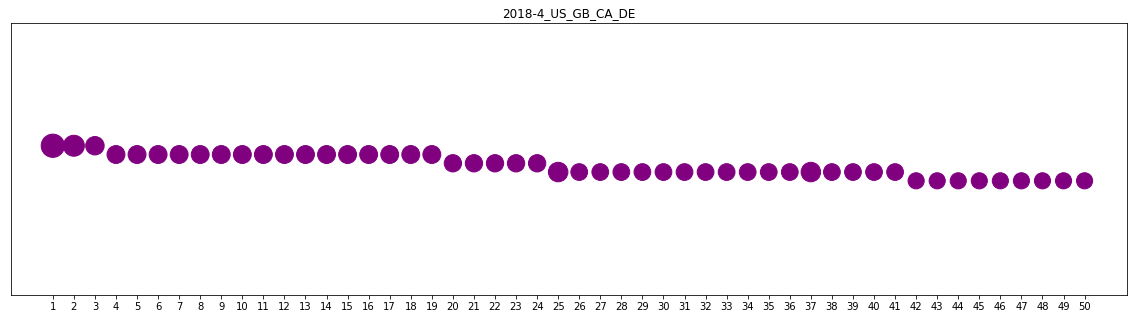

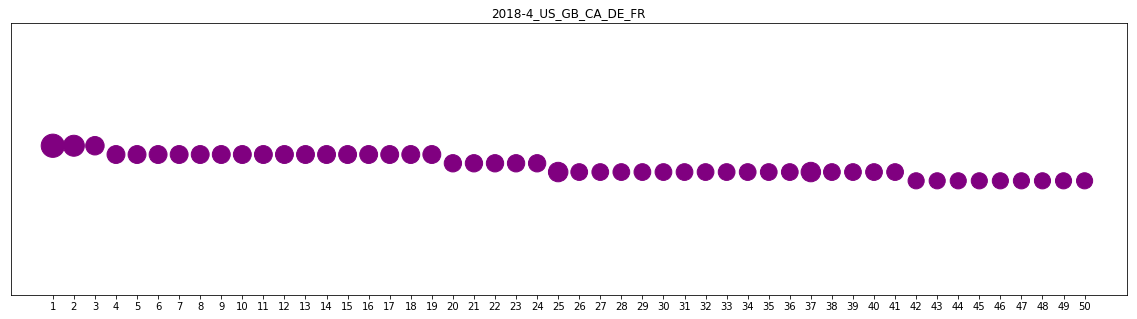

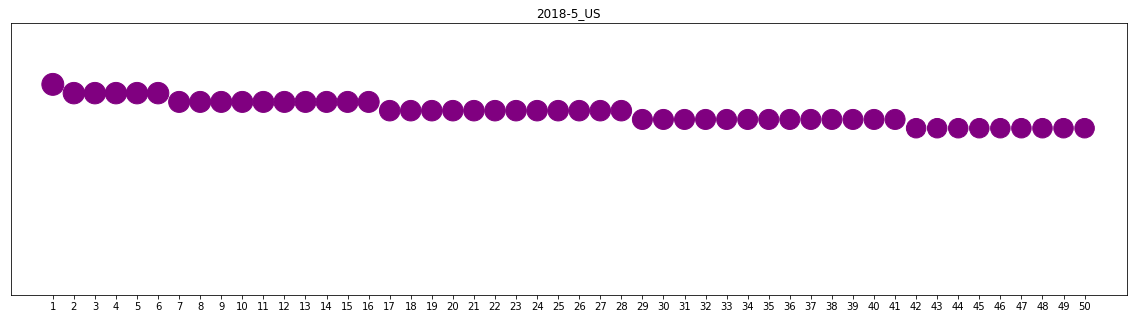

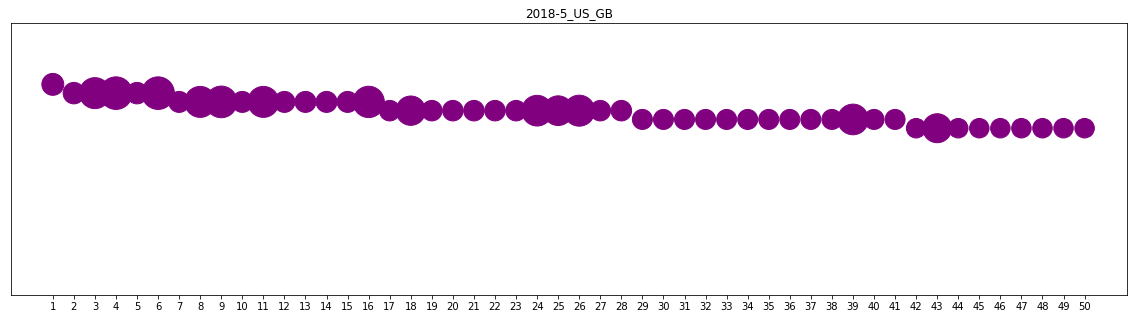

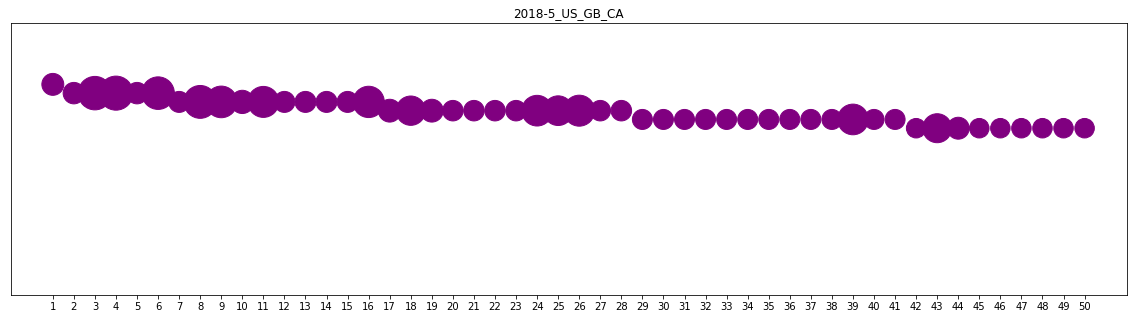

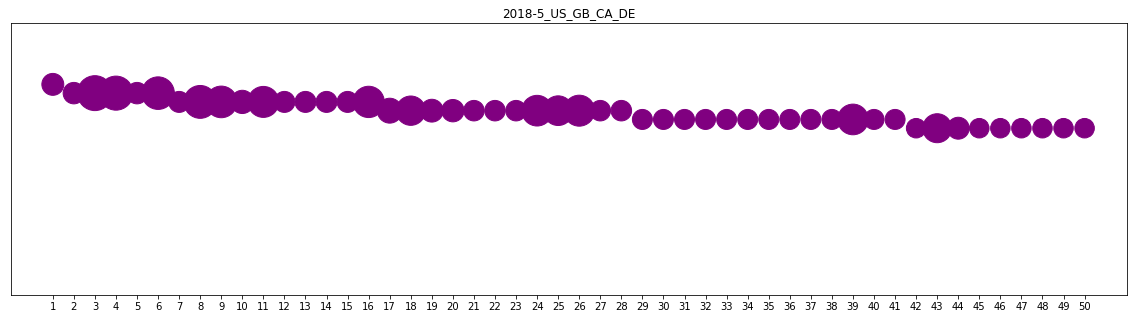

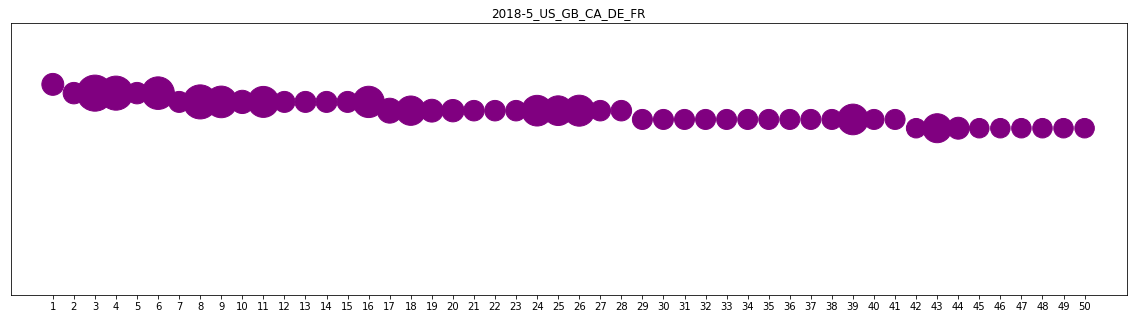

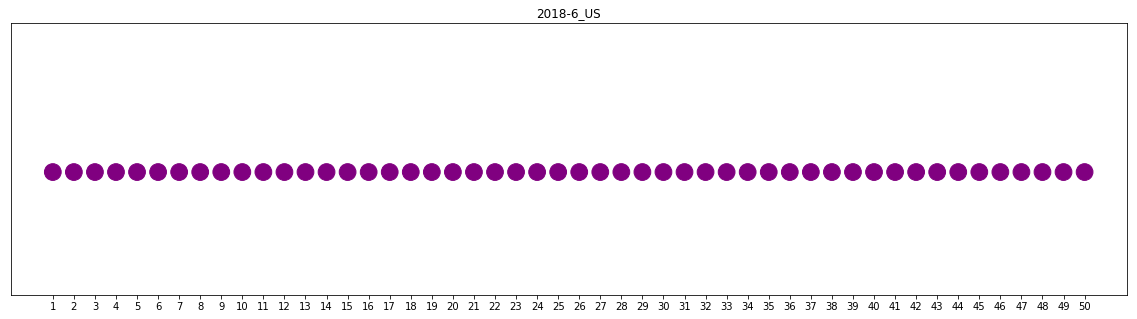

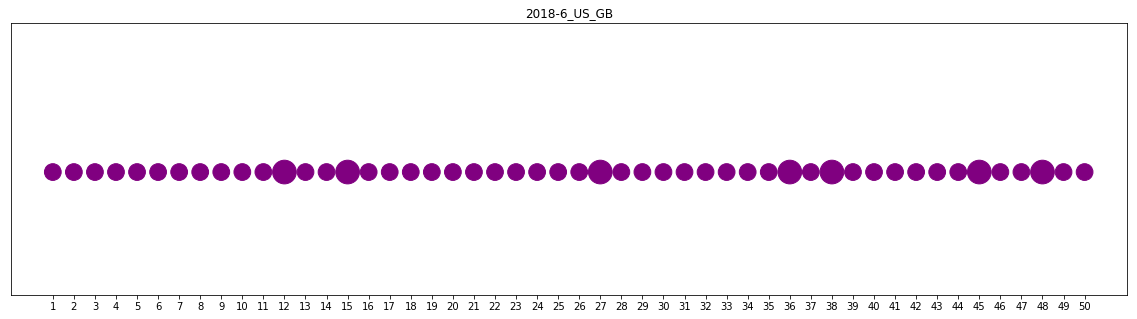

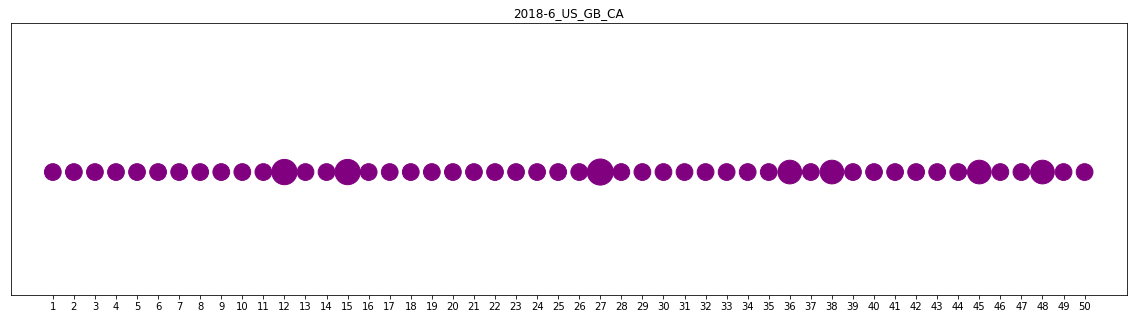

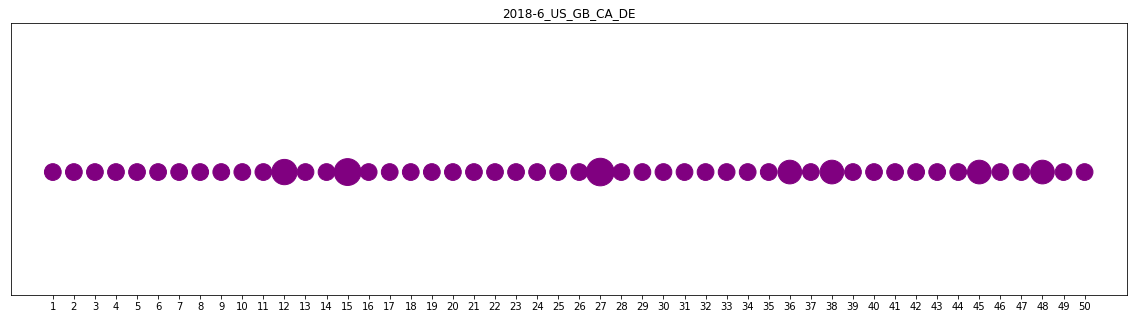

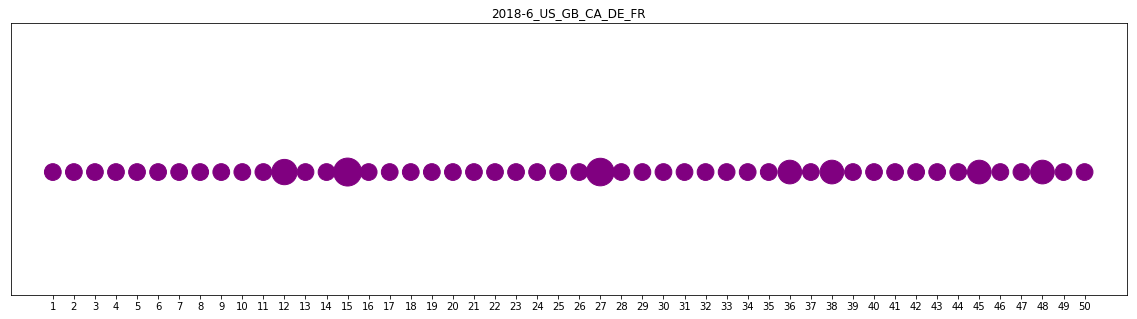

In [12]:
for month in months:
    us = us_top50_byMonth.loc[us_top50_byMonth['trending_YearMonth']==month,:]
    gb = gb_top50_byMonth.loc[gb_top50_byMonth['trending_YearMonth']==month,:]
    ca = ca_top50_byMonth.loc[ca_top50_byMonth['trending_YearMonth']==month,:]
    de = de_top50_byMonth.loc[de_top50_byMonth['trending_YearMonth']==month,:]
    fr = fr_top50_byMonth.loc[fr_top50_byMonth['trending_YearMonth']==month,:]
    us_dict = dict(zip(us['title'],us['video_id_count']))
    gb_dict = dict(zip(gb['title'],gb['video_id_count']))
    ca_dict = dict(zip(ca['title'],ca['video_id_count']))
    de_dict = dict(zip(de['title'],de['video_id_count']))
    fr_dict = dict(zip(fr['title'],fr['video_id_count']))

    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(50),us_dict.values(), s = 20*(np.array(list(us_dict.values()))), color = 'purple')
    plt.title(f'{month}_US')
    plt.ylim(0,31)
    plt.yticks([])
    #plt.ylabel('Number of Trending Days')
    plt.xlim(-2,51)
    plt.xticks(np.arange(50), np.arange(1,51,1))
    plt.savefig(f'Scatter_{month}_1.png')
    
    plt.show()
    us_gb_dict = us_dict.copy()
    for video in gb_dict.keys():
        if video in us_gb_dict.keys():
            us_gb_dict[video] = us_gb_dict[video] + gb_dict[video]
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(50),us_dict.values(), s = 20*np.array(list(us_gb_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB')
    #plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.yticks([])
    plt.xlim(-2,51)
    plt.xticks(np.arange(50), np.arange(1,51,1))
    plt.savefig(f'Scatter_{month}_2.png')
    plt.show()
    us_gb_ca_dict = us_gb_dict.copy()
    for video in ca_dict.keys():
        if video in us_gb_ca_dict.keys():
            us_gb_ca_dict[video] = us_gb_ca_dict[video] + ca_dict[video]
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(50),us_dict.values(), s = 20*np.array(list(us_gb_ca_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB_CA')
    #plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.yticks([])
    plt.xlim(-2,51)
    plt.xticks(np.arange(50), np.arange(1,51,1))
    plt.savefig(f'Scatter_{month}_3.png')
    plt.show()
    us_gb_ca_de_dict = us_gb_ca_dict.copy()
    for video in de_dict.keys():
        if video in us_gb_ca_de_dict.keys():
            us_gb_ca_de_dict[video] = us_gb_ca_de_dict[video] + de_dict[video]
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(50),us_dict.values(), s = 20*np.array(list(us_gb_ca_de_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE')
    #plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.yticks([])
    plt.xlim(-2,51)
    plt.xticks(np.arange(50), np.arange(1,51,1))
    plt.savefig(f'Scatter_{month}_4.png')
    plt.show()
    us_gb_ca_de_fr_dict = us_gb_ca_de_dict.copy()
    for video in fr_dict.keys():
        if video in us_gb_ca_de_fr_dict.keys():
            us_gb_ca_de_fr_dict[video] = us_gb_ca_de_fr_dict[video] + fr_dict[video]
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(50),us_dict.values(), s = 20*np.array(list(us_gb_ca_de_fr_dict.values())), color = 'purple')
    plt.title(f'{month}_US_GB_CA_DE_FR')
    #plt.ylabel('Number of Trending Days')
    plt.ylim(0,31)
    plt.yticks([])
    plt.xlim(-2,51)
    plt.xticks(np.arange(50), np.arange(1,51,1))
    plt.savefig(f'Scatter_{month}_5.png')
    plt.show()

,trending_YearMonth,title,category_id,video_id_count,category
350,2018-6,'Roseanne' Cast and Crew React to Cancellation...,24,14,Entertainment
351,2018-6,10 Surprising Things That Exist Inside Black H...,24,14,Entertainment
352,2018-6,10 of the Most GIANT Products that Actually Work!,23,14,Comedy
353,2018-6,435,27,14,Education
354,2018-6,"ASKING ALEXANDRIA - Someone, Somewhere (Acoustic)",10,14,Music
